PROYECTO FINAL TECNICAS DE APRENDIZAJE DE MAQUINA
-Andres Useche  - Juan Soto  - Rafael Torregroza 

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report

CARGA, EXPLORACI√ìN Y PREPROCESAMIENTO DE DATOS

In [11]:


# Cargar los datos
file_path = r"C:/Users/usech/Downloads/health_data.csv"
df = pd.read_csv(file_path)

# Mostrar dimensiones y primeras filas
display(df.shape), display(df.head())


(20000, 56)

Edad     G√©nero Estado civil      Altura        Peso  \
0  76.596326       Otro      Soltero  153.681426   76.920289   
1  79.795297       Otro       Casado  155.882307   66.743641   
2  90.603394       Otro       Casado  176.481841  124.818134   
3  22.154276   Femenino        Viudo  158.681358  114.807668   
4  46.176676  Masculino       Casado  184.451263   60.217207   

   √çndice de masa corporal ¬øFuma actualmente? ¬øFum√≥ en el pasado?  \
0                29.612895                 No                  S√≠   
1                 9.902543                 No                  No   
2                27.248719                 S√≠                  No   
3                27.634473                 No                  No   
4                24.094841                 No                  S√≠   

  ¬øConsume alcohol frecuentemente? Nivel de actividad f√≠sica  ...  \
0                               No                  Moderado  ...   
1                               No                  Moderado  ...   
2                               S√≠                  Moderado  ...   
3                               No                  Moderado  ...   
4                               No                Sedentario  ...   

  ¬øSufre de problemas de visi√≥n? ¬øTiene problemas de audici√≥n?  \
0                             No                            No   
1                             S√≠                            No   
2                             No                            No   
3                             No                            S√≠   
4                             No                            No   

  ¬øHa sufrido de fracturas √≥seas en el pasado?  \
0                                           No   
1                                           S√≠   
2                                           No   
3                                           No   
4                                           No   

  Nivel de satisfacci√≥n con la vida Enfermedad cardiovascular  Diabetes  \
0                             Medio                  0.674302 -0.171059   
1                              Bajo                 -0.014915  0.101641   
2                             Medio                  0.981927  0.054446   
3                              Bajo                  1.147131  0.256350   
4                             Medio                  1.067995  0.225792   

       Asma    C√°ncer  Obesidad Depresi√≥n/Ansiedad  
0  1.142946  0.293202 -0.130552           0.228336  
1 -0.059422  1.047785  0.216788           1.211533  
2  0.918964  0.138127 -0.030003          -0.205018  
3 -0.159599 -0.260462  1.363624           0.291855  
4  0.165198  0.015367  0.960565           1.427700  

[5 rows x 56 columns]

(None, None)

In [13]:
# Verificar tipos de datos y valores √∫nicos por columna
data_info = pd.DataFrame({
    "Tipo de Dato": df.dtypes,
    "Valores √önicos": df.nunique(),
    "Valores Nulos": df.isnull().sum()
})

# Ordenar para ver mejor
data_info_sorted = data_info.sort_values(by="Valores √önicos", ascending=True)

# Mostrar en pantalla
data_info_sorted.head(20)  # Puedes cambiar el n√∫mero si deseas ver m√°s


Tipo de Dato  \
¬øTiene antecedentes de obesidad en la familia?           object   
¬øHa sufrido de fracturas √≥seas en el pasado?             object   
Presi√≥n arterial                                         object   
¬øTiene antecedentes de asma?                             object   
¬øPadece de alguna alergia?                               object   
¬øHa tenido infecciones respiratorias frecuentes...       object   
¬øTiene dificultades para respirar durante el ej...       object   
¬øToma suplementos vitam√≠nicos?                           object   
¬øHa experimentado p√©rdida de peso no intencionada?       object   
¬øHa tenido dolor en el pecho recientemente?              object   
¬øExperimenta dolor en las articulaciones?                object   
¬øTiene problemas para conciliar el sue√±o?                object   
¬øHa tenido tos persistente en los √∫ltimos 3 meses?       object   
¬øHa experimentado depresi√≥n o ansiedad?                  object   
¬øConsume alimentos procesados frecuentemente?            object   
¬øPadece de insomnio?                                     object   
¬øTiene problemas digestivos frecuentes?                  object   
¬øHa tenido infecciones frecuentes?                       object   
¬øSufre de problemas de visi√≥n?                           object   
¬øTiene problemas de audici√≥n?                            object   

                                                    Valores √önicos  \
¬øTiene antecedentes de obesidad en la familia?                   2   
¬øHa sufrido de fracturas √≥seas en el pasado?                     2   
Presi√≥n arterial                                                 2   
¬øTiene antecedentes de asma?                                     2   
¬øPadece de alguna alergia?                                       2   
¬øHa tenido infecciones respiratorias frecuentes...               2   
¬øTiene dificultades para respirar durante el ej...               2   
¬øToma suplementos vitam√≠nicos?                                   2   
¬øHa experimentado p√©rdida de peso no intencionada?               2   
¬øHa tenido dolor en el pecho recientemente?                      2   
¬øExperimenta dolor en las articulaciones?                        2   
¬øTiene problemas para conciliar el sue√±o?                        2   
¬øHa tenido tos persistente en los √∫ltimos 3 meses?               2   
¬øHa experimentado depresi√≥n o ansiedad?                          2   
¬øConsume alimentos procesados frecuentemente?                    2   
¬øPadece de insomnio?                                             2   
¬øTiene problemas digestivos frecuentes?                          2   
¬øHa tenido infecciones frecuentes?                               2   
¬øSufre de problemas de visi√≥n?                                   2   
¬øTiene problemas de audici√≥n?                                    2   

                                                    Valores Nulos  
¬øTiene antecedentes de obesidad en la familia?                  0  
¬øHa sufrido de fracturas √≥seas en el pasado?                    0  
Presi√≥n arterial                                                0  
¬øTiene antecedentes de asma?                                    0  
¬øPadece de alguna alergia?                                      0  
¬øHa tenido infecciones respiratorias frecuentes...              0  
¬øTiene dificultades para respirar durante el ej...              0  
¬øToma suplementos vitam√≠nicos?                                  0  
¬øHa experimentado p√©rdida de peso no intencionada?              0  
¬øHa tenido dolor en el pecho recientemente?                     0  
¬øExperimenta dolor en las articulaciones?                       0  
¬øTiene problemas para conciliar el sue√±o?                       0  
¬øHa tenido tos persistente en los √∫ltimos 3 meses?              0  
¬øHa experimentado depresi√≥n o ansiedad?                         0  
¬øConsume alimentos procesados frecuentemente?                   0  
¬øPade

In [15]:
print("\ninformacion general del dataset: ")
display(df.info())
print("\n estadisticas descriptivas del dataset:")
display(df.describe())


informacion general del dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 56 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Edad                                                                 20000 non-null  float64
 1   G√©nero                                                               20000 non-null  object 
 2   Estado civil                                                         20000 non-null  object 
 3   Altura                                                               20000 non-null  float64
 4   Peso                                                                 20000 non-null  float64
 5   √çndice de masa corporal                                              20000 non-null  float64
 6   ¬øFuma actualmente?                                              

None


 estadisticas descriptivas del dataset:


Edad        Altura          Peso  √çndice de masa corporal  \
count  20000.000000  20000.000000  20000.000000             20000.000000   
mean      51.084494    174.571469     84.591538                24.939289   
std       21.536435     16.112692     22.660278                 5.570737   
min       -9.736027    125.857221     18.446075                -5.220232   
25%       34.371998    161.937829     66.996990                21.143283   
50%       51.153608    174.590126     84.533468                24.979186   
75%       67.944719    187.253346    102.438885                28.724510   
max      116.326437    225.202089    153.046182                48.318898   

       Enfermedad cardiovascular      Diabetes          Asma        C√°ncer  \
count               20000.000000  20000.000000  20000.000000  20000.000000   
mean                    0.303130      0.205536      0.150921      0.105589   
std                     0.514926      0.450558      0.399708      0.342888   
min                    -0.871191     -0.770928     -0.693624     -0.560999   
25%                    -0.085642     -0.096801     -0.094377     -0.087778   
50%                     0.130448      0.067079      0.039876      0.021789   
75%                     0.787913      0.317676      0.207847      0.151763   
max                     1.874630      1.843066      1.551884      1.495570   

           Obesidad  Depresi√≥n/Ansiedad  
count  20000.000000        20000.000000  
mean       0.248486            0.401899  
std        0.483748            0.545406  
min       -0.951822           -0.956367  
25%       -0.094818           -0.048414  
50%        0.090520            0.242945  
75%        0.547562            0.924828  
max        1.821224            1.915788

In [ ]:
Graficas descriptivas

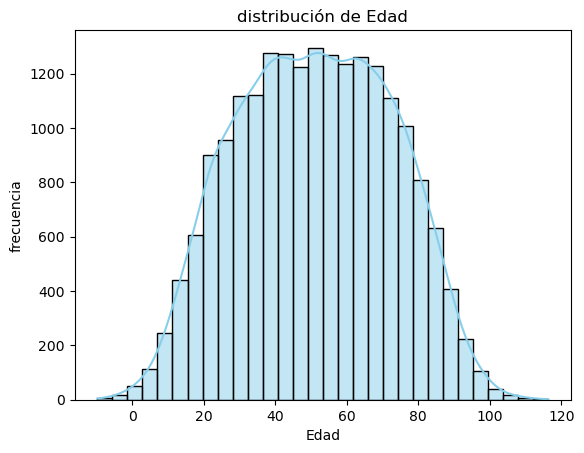

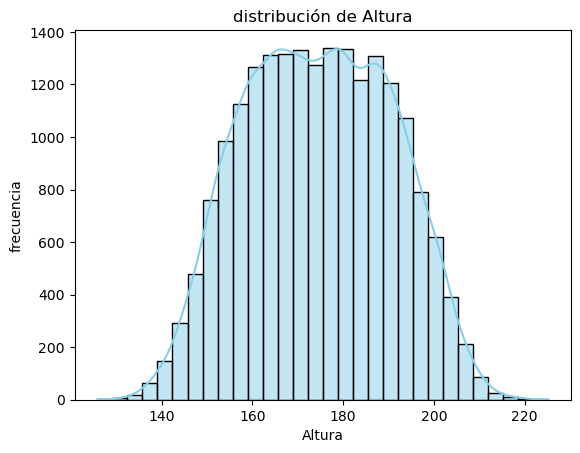

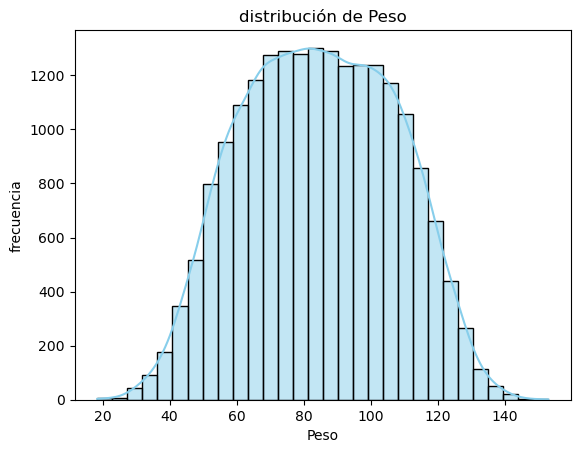

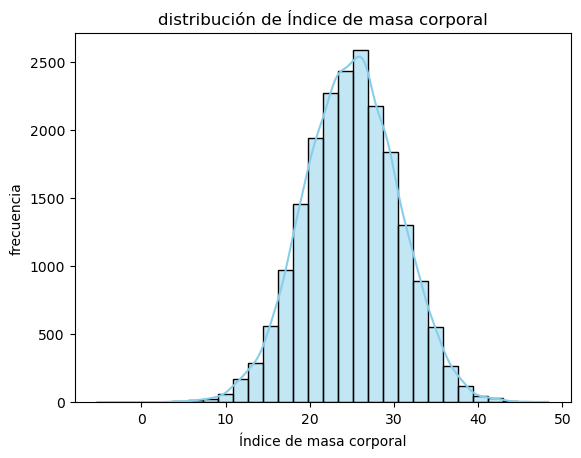

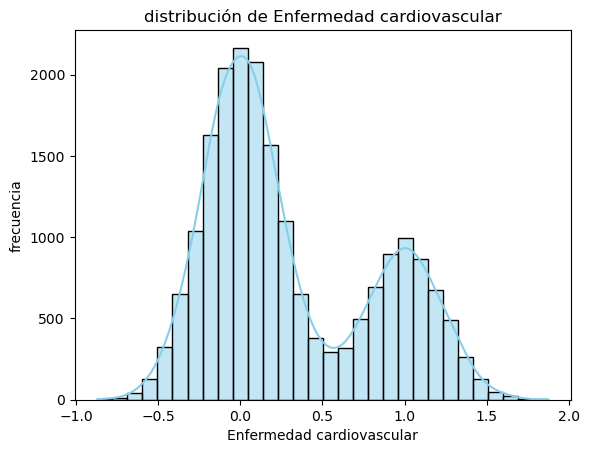

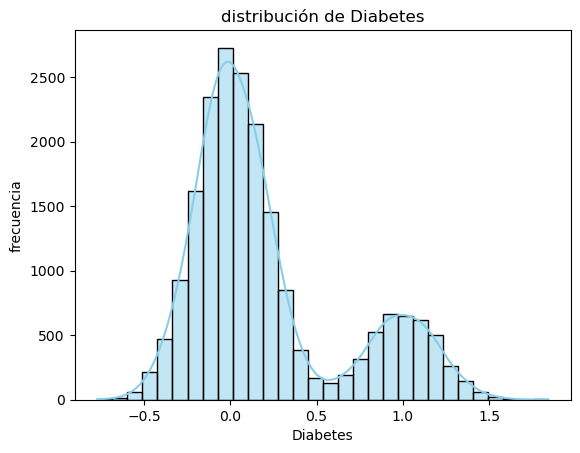

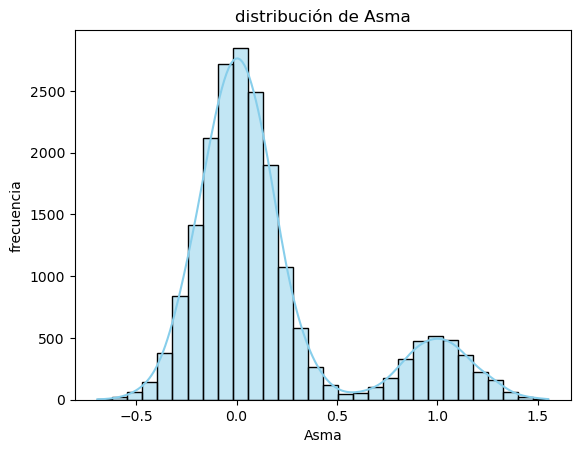

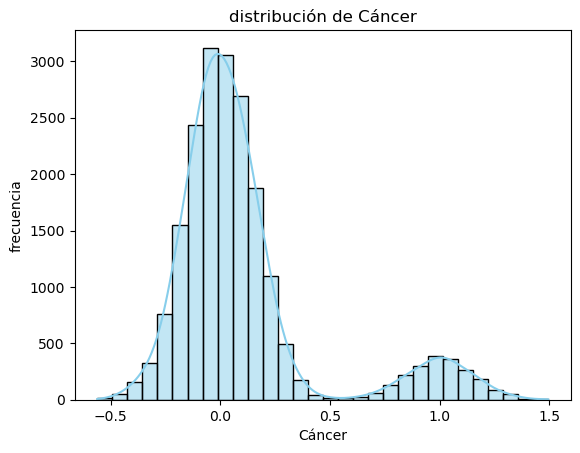

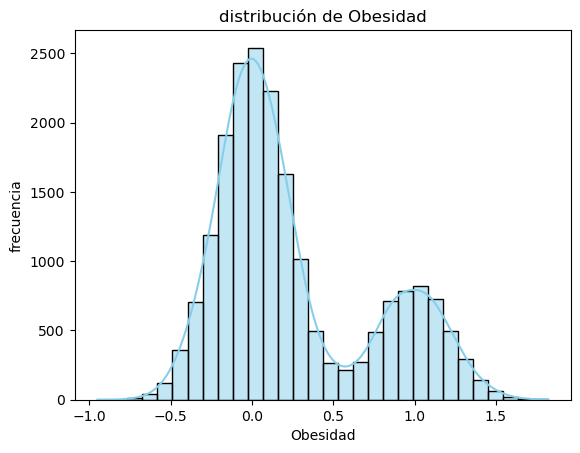

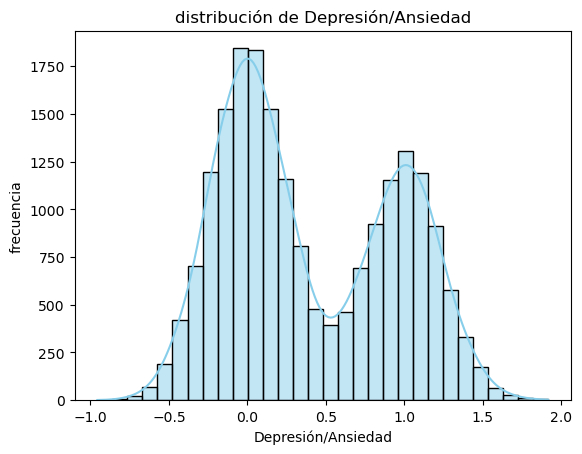

In [17]:
#distribucion de las variables numericas
numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=30, color = 'skyblue')
    plt.title(f'distribuci√≥n de {col}')
    plt.xlabel(col)
    plt.ylabel('frecuencia')
    plt.show()


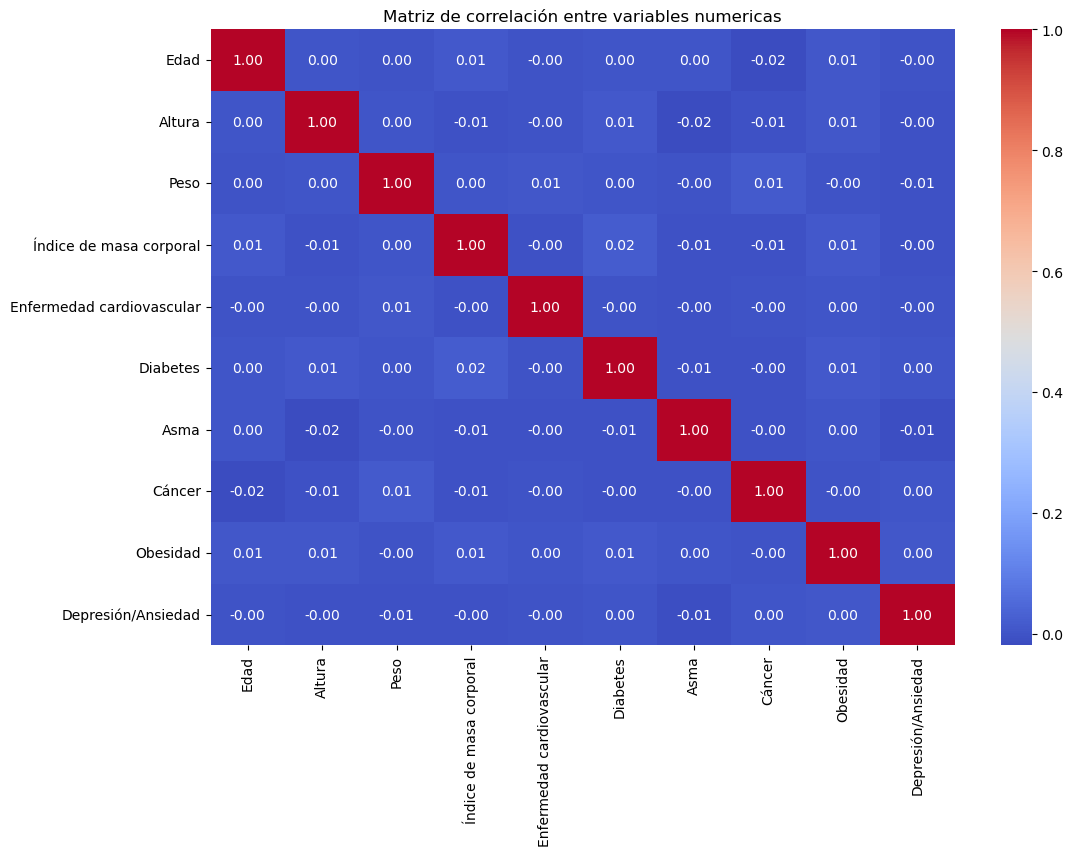

In [19]:
plt.figure(figsize=(12,8))
correlacion_matrix = df[numeric_cols].corr()
sns.heatmap(correlacion_matrix, annot=True,  cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlaci√≥n entre variables numericas')
plt.show()

In [21]:
# 1. Convertir S√≠/No a 1/0 en todas las columnas tipo object con solo 2 valores √∫nicos
yes_no_cols = [col for col in df.columns if df[col].dtype == 'object' and df[col].nunique() == 2]
df[yes_no_cols] = df[yes_no_cols].replace({'S√≠': 1, 'No': 0})

# 2. Convertir etiquetas continuas de enfermedades a binarias
etiquetas = ['Enfermedad cardiovascular', 'Diabetes', 'Asma', 'C√°ncer', 'Obesidad', 'Depresi√≥n/Ansiedad']
df[etiquetas] = df[etiquetas].applymap(lambda x: 1 if x > 0 else 0)  # usa umbral 0

# Verificar cambio
df[yes_no_cols + etiquetas].head()


C:\Users\usech\AppData\Local\Temp\ipykernel_29880\2196431214.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[yes_no_cols] = df[yes_no_cols].replace({'S√≠': 1, 'No': 0})
C:\Users\usech\AppData\Local\Temp\ipykernel_29880\2196431214.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[etiquetas] = df[etiquetas].applymap(lambda x: 1 if x > 0 else 0)  # usa umbral 0


¬øFuma actualmente?  ¬øFum√≥ en el pasado?  ¬øConsume alcohol frecuentemente?  \
0                   0                    1                                 0   
1                   0                    0                                 0   
2                   1                    0                                 1   
3                   0                    0                                 0   
4                   0                    1                                 0   

   ¬øTiene una dieta equilibrada?  ¬øConsume frutas y verduras diariamente?  \
0                              1                                        0   
1                              1                                        1   
2                              1                                        0   
3                              0                                        0   
4                              0                                        1   

   ¬øDuerme al menos 7 horas por noche?  ¬øExperimenta estr√©s con frecuencia?  \
0                                    1                                    0   
1                                    1                                    1   
2                                    0                                    1   
3                                    0                                    0   
4                                    1                                    0   

   ¬øTiene antecedentes de hipertensi√≥n en la familia?  \
0                                                  0    
1                                                  0    
2                                                  1    
3                                                  1    
4                                                  0    

   ¬øTiene antecedentes de diabetes en la familia?  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               1   

   ¬øTiene antecedentes de c√°ncer en la familia?  ...  \
0                                             0  ...   
1                                             0  ...   
2                                             0  ...   
3                                             0  ...   
4                                             0  ...   

   ¬øHa tenido infecciones frecuentes?  ¬øSufre de problemas de visi√≥n?  \
0                                   0                               0   
1                                   0                               1   
2                                   0                               0   
3                                   0                               0   
4                                   1                               0   

   ¬øTiene problemas de audici√≥n? ¬øHa sufrido de fracturas √≥seas en el pasado?  \
0                              0                                            0   
1                              0                                            1   
2                              0                                            0   
3                              1                                            0   
4                              0                                            0   

  Enfermedad cardiovascular Diabetes Asma  C√°ncer  Obesidad  \
0                         1        0    1       1         0   
1                         0        1    0       1         1   
2                         1        1    1       1         0   
3                         1        1    0       0         1   
4                         1        1    1       1         1   

   Depresi√≥n/Ansiedad  
0                   1  
1                   1  
2                   0  
3                   1  
4                   1  

[5 rows x 42 columns]

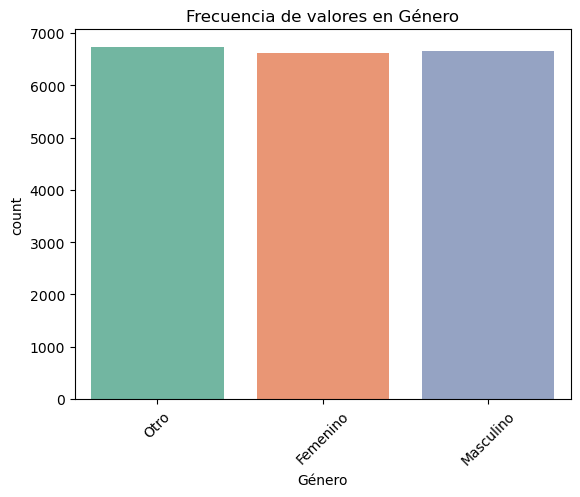

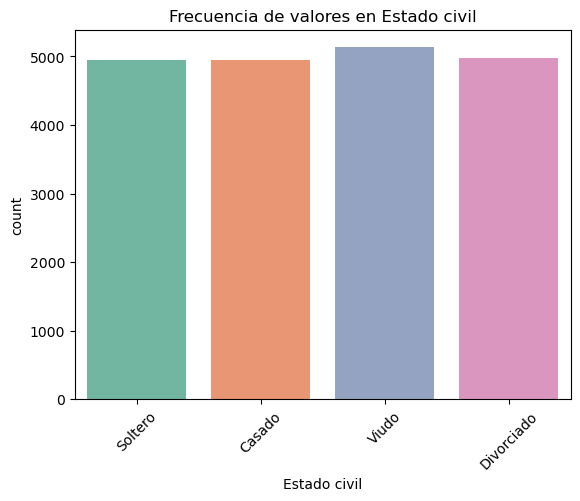

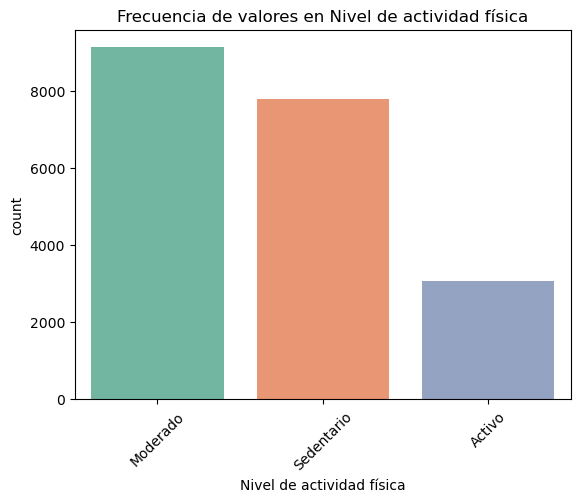

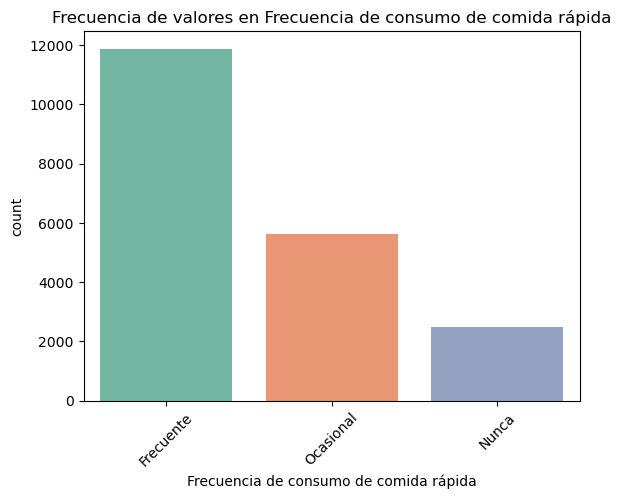

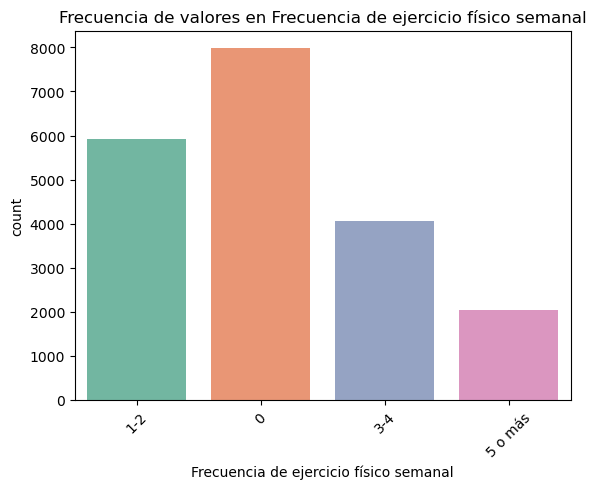

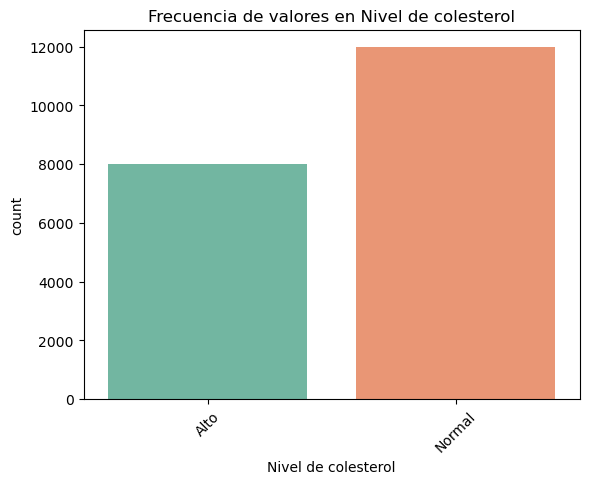

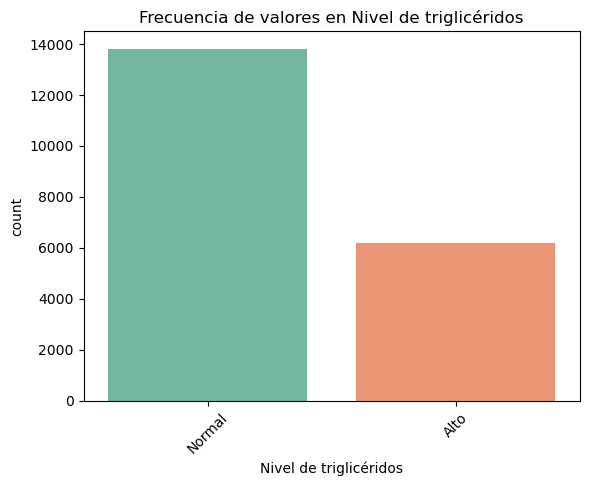

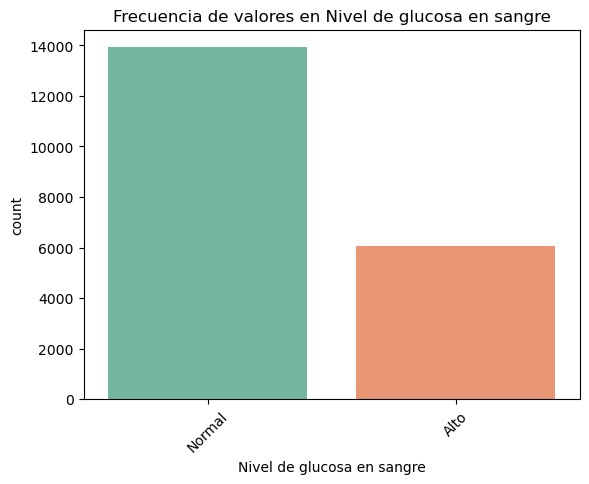

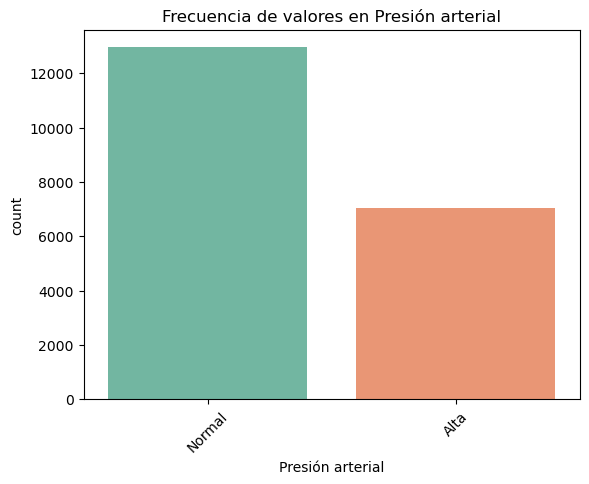

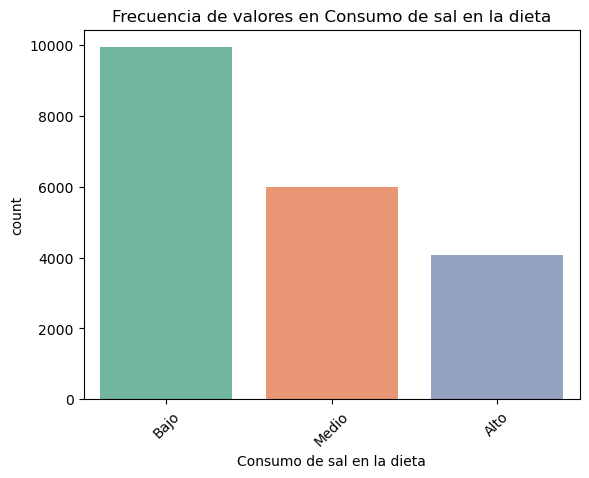

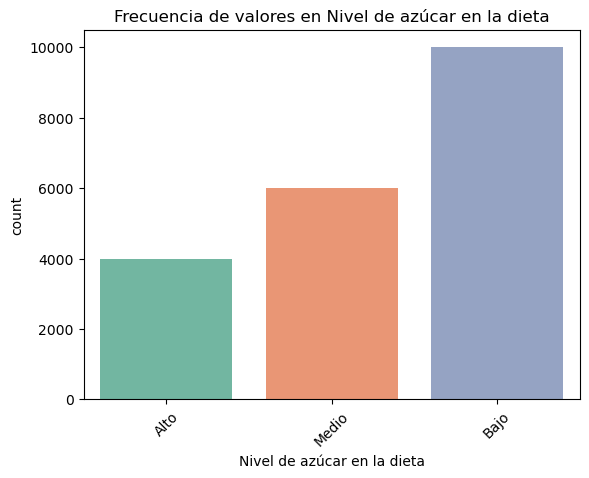

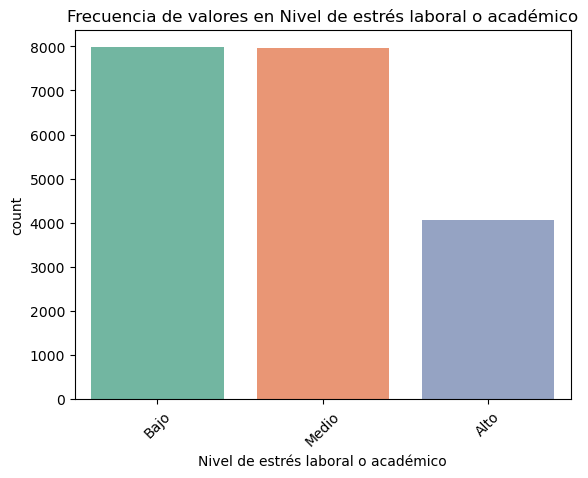

In [199]:
#Conteo de valores de variables categoricas
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure()
    sns.countplot(data=df, x=col, hue=col, palette='Set2', legend=False)

    plt.title(f'Frecuencia de valores en {col}')
    plt.xticks(rotation=45)
    plt.show()

Distribuci√≥n de las clases de la variable objetivo

In [201]:
import matplotlib.pyplot as plt

# Lista de etiquetas objetivo
target_labels = ['Enfermedad cardiovascular', 'Diabetes', 'Asma', 'C√°ncer', 'Obesidad', 'Depresi√≥n/Ansiedad']

# Crear gr√°fico de barras para distribuci√≥n binaria
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
axs = axs.ravel()

for i, label in enumerate(target_labels):
    df[label].value_counts().sort_index().plot(kind='bar', ax=axs[i])
    axs[i].set_title(label)
    axs[i].set_xticks([0, 1])
    axs[i].set_xticklabels(['No', 'S√≠'])
    axs[i].set_ylabel('Cantidad')

plt.tight_layout()
plt.show()


Matrices de correlaci√≥n

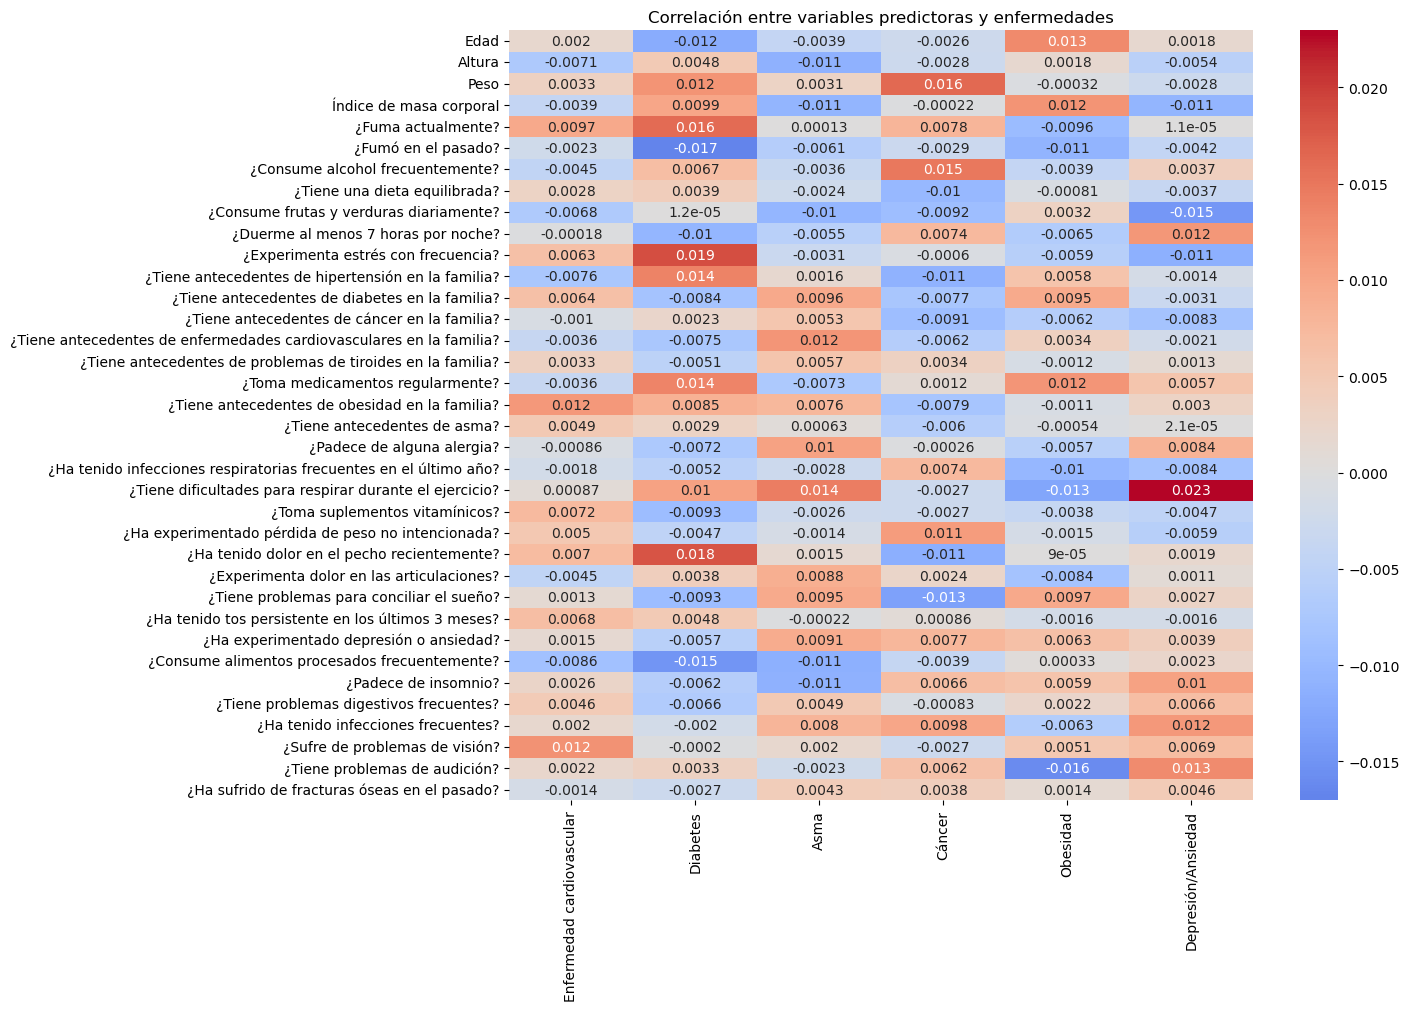

In [175]:
# Recargar archivos y bibliotecas despu√©s del reinicio
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta del archivo cargado anteriormente

# Preprocesamiento necesario para llegar al paso anterior

# 1. Convertir S√≠/No a 1/0 en columnas tipo object con solo 2 valores √∫nicos
yes_no_cols = [col for col in df.columns if df[col].dtype == 'object' and df[col].nunique() == 2]
df[yes_no_cols] = df[yes_no_cols].replace({'S√≠': 1, 'No': 0})

# 2. Discretizar variables objetivo
target_labels = ['Enfermedad cardiovascular', 'Diabetes', 'Asma', 'C√°ncer', 'Obesidad', 'Depresi√≥n/Ansiedad']
df[target_labels] = df[target_labels].applymap(lambda x: 1 if x > 0 else 0)

# 3. Calcular matriz de correlaci√≥n
correlation_matrix = df.corr(numeric_only=True)

# 4. Subset de correlaciones con etiquetas
correlations_with_targets = correlation_matrix[target_labels].drop(index=target_labels)

# 5. Graficar
plt.figure(figsize=(12, 10))
sns.heatmap(correlations_with_targets, annot=True, cmap='coolwarm', center=0)
plt.title("Correlaci√≥n entre variables predictoras y enfermedades")
plt.show()


Detecci√≥n de outliers

In [23]:
# Funci√≥n para detectar outliers usando el rango intercuart√≠lico (IQR)
def detectar_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 -Q1
    outliers = df[(df[col] < Q1 -1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    return outliers
#  Revisar columnas con posibles outliers
for col in numeric_cols:
    outliers = detectar_outliers(col)
    print(f"{col} : {len(outliers)} outliers detectados")

Edad : 0 outliers detectados
Altura : 0 outliers detectados
Peso : 0 outliers detectados
√çndice de masa corporal : 135 outliers detectados
Enfermedad cardiovascular : 0 outliers detectados
Diabetes : 0 outliers detectados
Asma : 0 outliers detectados
C√°ncer : 0 outliers detectados
Obesidad : 0 outliers detectados
Depresi√≥n/Ansiedad : 0 outliers detectados


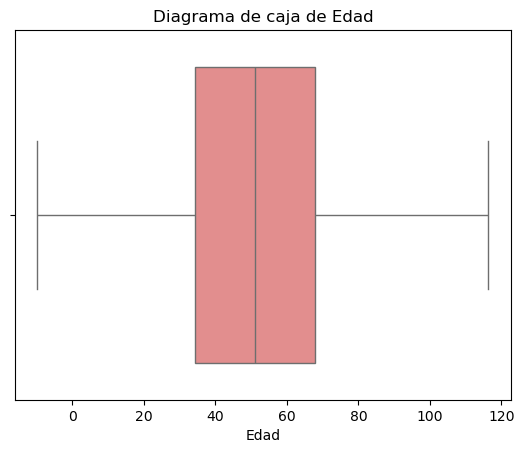

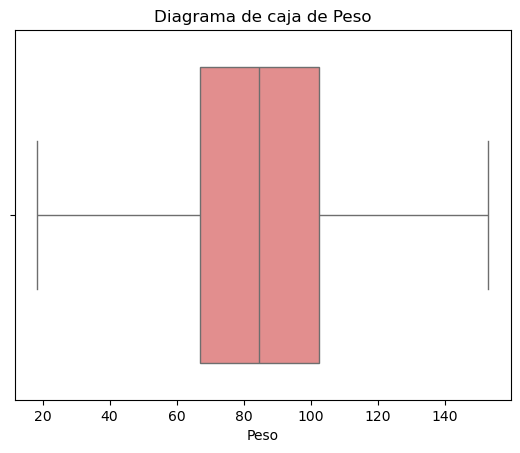

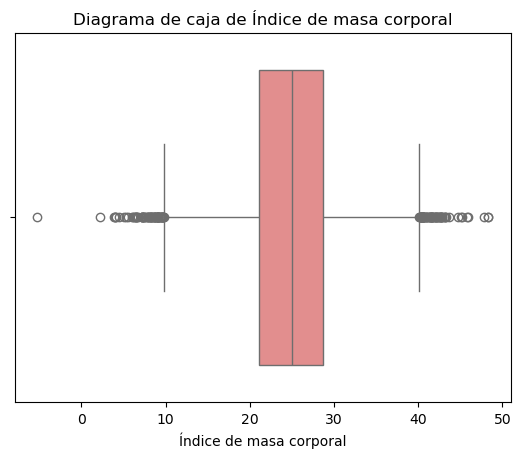

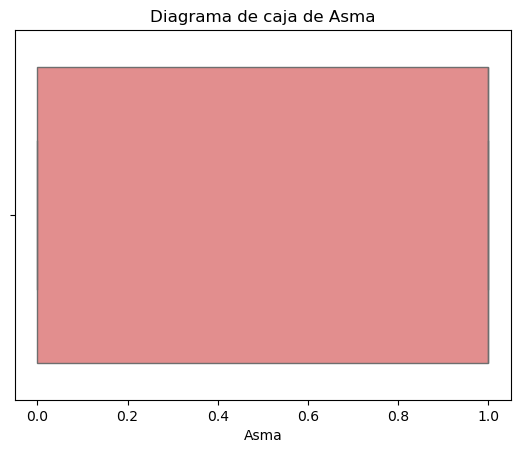

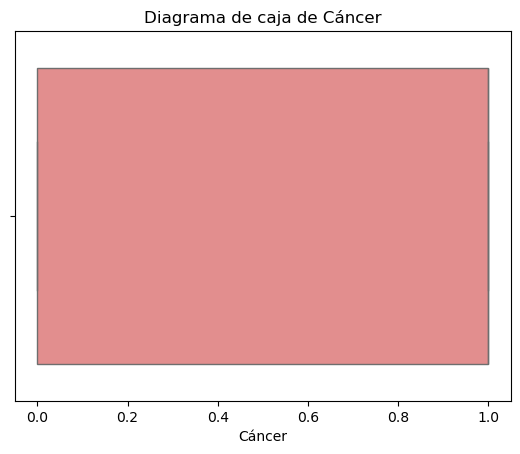

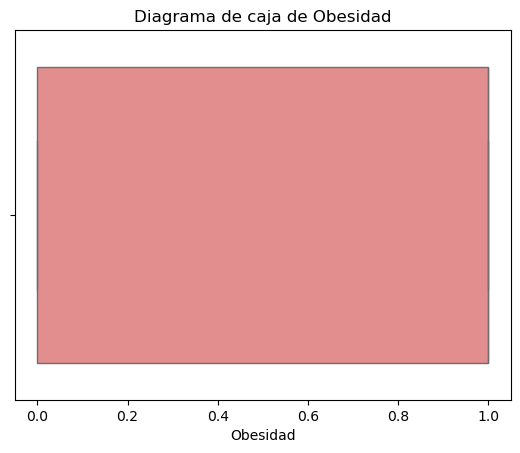

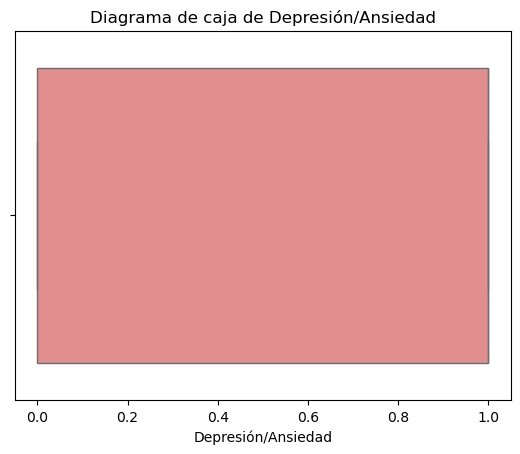

In [207]:
#diagramas de caja para detectasr outliers
for col in numeric_cols:
    plt.figure()
    sns.boxplot(data=df, x=col, color='lightcoral')
    plt.title(f'Diagrama de caja de {col}')
    plt.xlabel(col)
    plt.show()

**MODELAMIENTO**

In [33]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# 1. Reemplazar S√≠/No por 1/0
yes_no_cols = [col for col in df.columns if df[col].dtype == 'object' and df[col].nunique() == 2]
df[yes_no_cols] = df[yes_no_cols].replace({'S√≠': 1, 'No': 0})

# 2. Discretizar etiquetas
target_labels = ['Enfermedad cardiovascular', 'Diabetes', 'Asma', 'C√°ncer', 'Obesidad', 'Depresi√≥n/Ansiedad']
for label in target_labels:
    df[label] = df[label].map(lambda x: 1 if x > 0 else 0)

# 3. Detectar TODAS las columnas categ√≥ricas (tipo object)
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# 4. Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 5. Variables predictoras
X = df_encoded.drop(columns=target_labels)

# 6. Estandarizaci√≥n y PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# 7. Varianza explicada
explained_variance = pd.DataFrame({
    "Componente Principal": [f"PC{i+1}" for i in range(10)],
    "Varianza Explicada (%)": pca.explained_variance_ratio_ * 100
})
print(explained_variance)


  Componente Principal  Varianza Explicada (%)
0                  PC1                2.813897
1                  PC2                2.732626
2                  PC3                2.681300
3                  PC4                2.669503
4                  PC5                2.645838
5                  PC6                2.431520
6                  PC7                2.184910
7                  PC8                2.179350
8                  PC9                2.158293
9                 PC10                2.141704


---

###  Justificaci√≥n de la Selecci√≥n de Variables

####  1. **Por an√°lisis de correlaci√≥n:**

Se observ√≥ que aunque la mayor√≠a de variables tienen **correlaciones muy bajas**, algunas presentan relaciones como:

| Enfermedad             | Variables con mayor correlaci√≥n positiva                     |
| ---------------------- | ------------------------------------------------------------ |
| **Obesidad**           | √çndice de masa corporal, Antecedentes familiares de obesidad |
| **Asma**               | Dificultades para respirar, Antecedentes de asma             |
| **Depresi√≥n/Ansiedad** | Estr√©s frecuente, Depresi√≥n previa, Problemas para dormir    |
| **C√°ncer**             | Antecedentes familiares de c√°ncer                            |
| **Diabetes**           | Antecedentes familiares de diabetes, Dieta, Peso             |
| **Cardiovascular**     | Colesterol, Hipertensi√≥n, Edad                               |

Estas variables fueron seleccionadas como **claves** por su coherencia m√©dica y su correlaci√≥n directa, aunque fueron debiles al hacer la matriz de correlacion
---

####  2. ** PCA:**

El An√°lisis de Componentes Principales mostr√≥ que los datos est√°n muy distribuidos (cada componente solo explica \~2.7% de la varianza), pero permiti√≥ identificar combinaciones de variables latentes que podr√≠an ser √∫tiles en modelos como SVM o redes neuronales, donde no es indispensable la interpretaci√≥n individual de cada variable.

**Conclusi√≥n**:

* Para modelos interpretables (√Årboles, Logistic Regression): se usar√°n las variables con correlaci√≥n m√°s alta con cada enfermedad daba por este analisis
* Para modelos complejos (SVM, MLP): se puede usar el conjunto completo o reducido por la aplicacion de PCA.

---



In [27]:
print("df_encoded - Filas:", df_encoded.shape[0])
print("df_encoded - Columnas:", df_encoded.shape[1])


df_encoded - Filas: 20000
df_encoded - Columnas: 68


In [227]:
print("N√∫mero de filas:", df.shape[0])
print("N√∫mero de columnas:", df.shape[1])


N√∫mero de filas: 20000
N√∫mero de columnas: 56


In [229]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=target_labels)
y = df_encoded[target_labels]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV

# Espacio reducido pero √∫til de hiperpar√°metros para SVM
param_grid_svm = {
    'estimator__C': [0.1, 1, 10],
    'estimator__kernel': ['linear', 'rbf'],
    'estimator__gamma': ['scale', 'auto'],
    'estimator__coef0': [0.0],  # solo necesario para 'poly' o 'sigmoid', aqu√≠ no lo usamos
    'estimator__degree': [3]    # solo para 'poly', igual lo dejamos fijo
}

# Definir modelo base
ovr_svm = OneVsRestClassifier(SVC())

# GridSearchCV
grid_svm = GridSearchCV(
    estimator=ovr_svm,
    param_grid=param_grid_svm,
    cv=3,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)

#entrenamiento del modelo
grid_svm.fit(X_train, y_train)

# Resultados
print(grid_svm.best_params_)
print(grid_svm.best_score_)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
{'estimator__C': 0.1, 'estimator__coef0': 0.0, 'estimator__degree': 3, 'estimator__gamma': 'scale', 'estimator__kernel': 'linear'}
0.7623026048829264




---

###  **modelo SVM y ajuste de hiperpar√°metros**

> Para el modelo de **M√°quinas de Vectores de Soporte (SVM)** se realiz√≥ un ajuste de hiperpar√°metros utilizando **GridSearchCV**, evaluando un espacio moderadamente amplio que inclu√≠a distintas combinaciones de los siguientes par√°metros:
>
> * `C`: \[0.1, 1, 10]
> * `kernel`: \['linear', 'rbf']
> * `gamma`: \['scale', 'auto']
> * `coef0` y `degree`: incluidos para compatibilidad aunque no afectan a los kernels evaluados
>
> La evaluaci√≥n se realiz√≥ con validaci√≥n cruzada de 3 pliegues y la m√©trica de optimizaci√≥n fue el **F1-score macro**, debido a la naturaleza multietiqueta del problema.
>
> El mejor rendimiento se obtuvo con los siguientes hiperpar√°metros:
>
> ```python
> {
>  'estimator__C': 0.1,
>  'estimator__kernel': 'linear',
>  'estimator__gamma': 'scale',
>  'estimator__coef0': 0.0,
>  'estimator__degree': 3
> }
> ```
>
> Con esta configuraci√≥n, el modelo alcanz√≥ un **F1-score macro de 0.7623**, igualando al rendimiento del modelo Random Forest optimizado.
>
> Este resultado sugiere que, en este conjunto de datos, una **SVM lineal con bajo valor de C (0.1)** generaliza mejor al evitar el sobreajuste. Adem√°s, el uso de un kernel lineal indica que los datos presentan una separaci√≥n suficiente sin necesidad de transformar el espacio mediante kernels no lineales como `rbf` o `poly`. Esta configuraci√≥n tambi√©n implica una reducci√≥n significativa en el tiempo de entrenamiento y mayor interpretabilidad, sin embargo, el tiempo de entrenamiendo fue demasiado largo casi de una hora siendo solo 12 combinaciones para las variables de este problema

---



Fitting 3 folds for each of 24 candidates, totalling 72 fits

‚è±Ô∏è Tiempo de entrenamiento: 671.63 segundos
‚úÖ Mejores par√°metros: {'estimator__activation': 'tanh', 'estimator__alpha': 0.0001, 'estimator__hidden_layer_sizes': (100,), 'estimator__learning_rate_init': 0.01, 'estimator__solver': 'adam'}
üìä Reporte de clasificaci√≥n en test:

                           precision    recall  f1-score   support

Enfermedad cardiovascular       0.66      1.00      0.79      2621
                 Diabetes       0.60      1.00      0.75      2392
                     Asma       0.58      1.00      0.73      2302
                   C√°ncer       1.00      0.00      0.00      2205
                 Obesidad       0.63      1.00      0.77      2513
       Depresi√≥n/Ansiedad       0.70      1.00      0.82      2805

                micro avg       0.63      0.85      0.73     14838
                macro avg       0.69      0.83      0.64     14838
             weighted avg       0.69      0.85

C:\Users\usech\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


üîÅ Matriz de confusi√≥n por etiqueta (entrenamiento):

Etiqueta: Enfermedad cardiovascular
[[    0  5590]
 [    0 10410]]
----------------------------------------


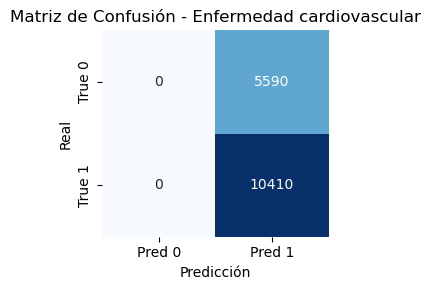

Etiqueta: Diabetes
[[   0 6346]
 [   0 9654]]
----------------------------------------


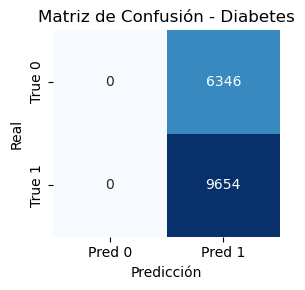

Etiqueta: Asma
[[   0 6765]
 [   0 9235]]
----------------------------------------


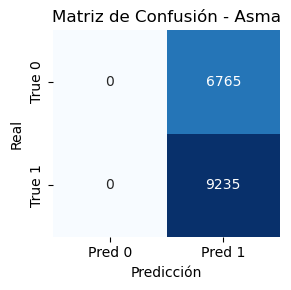

Etiqueta: C√°ncer
[[7196    0]
 [8796    8]]
----------------------------------------


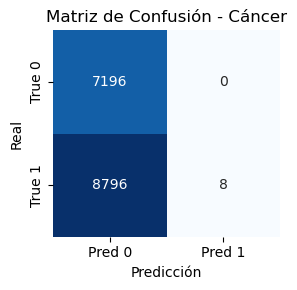

Etiqueta: Obesidad
[[   0 6065]
 [   0 9935]]
----------------------------------------


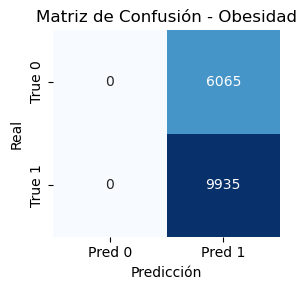

Etiqueta: Depresi√≥n/Ansiedad
[[    0  4767]
 [    0 11233]]
----------------------------------------


In [53]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, multilabel_confusion_matrix
import time
import seaborn as sns
import matplotlib.pyplot as plt

# Definir espacio de b√∫squeda
param_grid_mlp = {
    'estimator__hidden_layer_sizes': [(100,), (100, 50), (50, 50)],
    'estimator__activation': ['relu', 'tanh'],
    'estimator__solver': ['adam'],
    'estimator__alpha': [0.0001, 0.001],
    'estimator__learning_rate_init': [0.001, 0.01]
}

# Envolver MLPClassifier en OneVsRest
ovr_mlp = OneVsRestClassifier(MLPClassifier(max_iter=300, random_state=42))

# GridSearchCV
grid_mlp = GridSearchCV(
    estimator=ovr_mlp,
    param_grid=param_grid_mlp,
    cv=3,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)

# ‚è±Ô∏è Tiempo de entrenamiento
start_time = time.time()
grid_mlp.fit(X_train, y_train)
end_time = time.time()

# ‚úÖ Resultados
mejor_modelo_mlp = grid_mlp.best_estimator_
mejores_params_mlp = grid_mlp.best_params_

print(f"\n‚è±Ô∏è Tiempo de entrenamiento: {end_time - start_time:.2f} segundos")
print(f"‚úÖ Mejores par√°metros: {mejores_params_mlp}")

# üìä Reporte de clasificaci√≥n en test
y_pred_mlp = mejor_modelo_mlp.predict(X_test)
print("üìä Reporte de clasificaci√≥n en test:\n")
print(classification_report(y_test, y_pred_mlp, target_names=y_test.columns))

# üîÅ Matriz de confusi√≥n por etiqueta en entrenamiento
y_train_pred = mejor_modelo_mlp.predict(X_train)
mcm = multilabel_confusion_matrix(y_train, y_train_pred)

print("üîÅ Matriz de confusi√≥n por etiqueta (entrenamiento):\n")
for i, label in enumerate(y_train.columns):
    print(f"Etiqueta: {label}")
    print(mcm[i])
    print("-" * 40)

    # Opcional: mostrar con heatmap
    plt.figure(figsize=(3, 3))
    sns.heatmap(mcm[i], annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Pred 0", "Pred 1"],
                yticklabels=["True 0", "True 1"])
    plt.title(f"Matriz de Confusi√≥n - {label}")
    plt.xlabel("Predicci√≥n")
    plt.ylabel("Real")
    plt.tight_layout()
    plt.show()


---

### ‚úÖ **Mejores Hiperpar√°metros **

```python
{
 'estimator__activation': 'tanh',
 'estimator__alpha': 0.0001,
 'estimator__hidden_layer_sizes': (100,),
 'estimator__learning_rate_init': 0.01,
 'estimator__solver': 'adam'
}
```

üìà **F1-score (macro) obtenido:** `0.7623`, es muy parecido a SVM en desempe√±o sin ninguna mejora

---
Tiempo de entrenamiento: 671.63 segundos

> Para el modelo de **Red Neuronal Multicapa (MLPClassifier)**, se llev√≥ a cabo un ajuste de hiperpar√°metros mediante `GridSearchCV` sobre 5 par√°metros clave. Se evaluaron 24 combinaciones mediante validaci√≥n cruzada con 3 pliegues, utilizando como m√©trica de optimizaci√≥n el **F1-score macro**.
>
> Los hiperpar√°metros considerados fueron:
>
> * `hidden_layer_sizes`: \[(100,), (100, 50), (50, 50)]
> * `activation`: \['relu', 'tanh']
> * `alpha`: \[0.0001, 0.001]
> * `learning_rate_init`: \[0.001, 0.01]
> * `solver`: \['adam']
>
> La mejor configuraci√≥n fue:
>
> ```python
> {
>  'activation': 'tanh',
>  'alpha': 0.0001,
>  'hidden_layer_sizes': (100,),
>  'learning_rate_init': 0.01,
>  'solver': 'adam'
> }
> ```
>
> Con esta configuraci√≥n, la red neuronal alcanz√≥ un **F1-score macro de 0.7623**, comparable a los mejores modelos evaluados (SVM).
> El uso de una sola capa oculta de 100 neuronas, junto con una funci√≥n de activaci√≥n `tanh` y una tasa de aprendizaje inicial de 0.01, permiti√≥ una convergencia eficiente sin sobreajuste. El par√°metro `alpha=0.0001` actu√≥ como regularizador L2, ayudando a controlar la complejidad del modelo a causa de los mismos datos.

---



CON TODAS LAS VARIABLES

In [37]:

 #Aplicar One-Hot Encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Variables predictoras
X = df.drop(columns=target_labels)

# Estandarizaci√≥n y PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:

X = df.drop(columns=target_labels)
y = df[target_labels]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


RANDOMFOREST

Fitting 3 folds for each of 48 candidates, totalling 144 fits


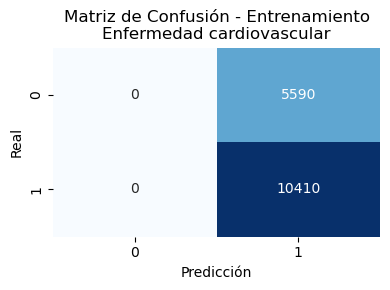

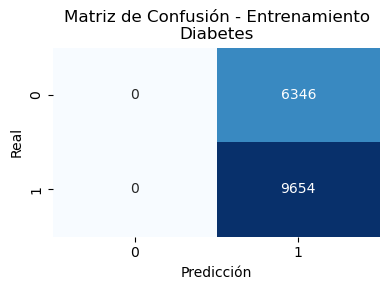

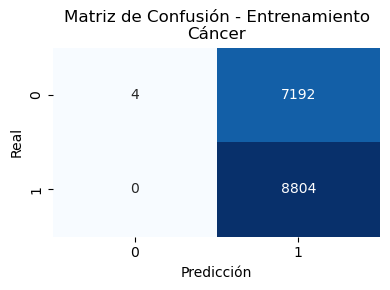

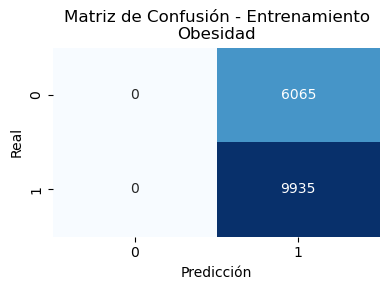

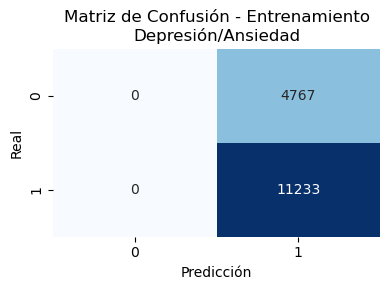


‚è±Ô∏è Tiempo de entrenamiento: 101.46 segundos
‚úÖ Mejores par√°metros: {'estimator__bootstrap': True, 'estimator__max_depth': 5, 'estimator__max_features': 'log2', 'estimator__min_samples_split': 2, 'estimator__n_estimators': 100}
üìä Reporte de clasificaci√≥n:

                           precision    recall  f1-score   support

Enfermedad cardiovascular       0.66      1.00      0.79      2621
                 Diabetes       0.60      1.00      0.75      2392
                     Asma       0.58      1.00      0.73      2302
                   C√°ncer       0.55      1.00      0.71      2205
                 Obesidad       0.63      1.00      0.77      2513
       Depresi√≥n/Ansiedad       0.70      1.00      0.82      2805

                micro avg       0.62      1.00      0.76     14838
                macro avg       0.62      1.00      0.76     14838
             weighted avg       0.62      1.00      0.77     14838
              samples avg       0.62      1.00      0.74   

In [235]:
from sklearn.ensemble import RandomForestClassifier

# Definir el espacio de b√∫squeda de hiperpar√°metros
param_grid_rf = {
    'estimator__n_estimators': [50, 100],
    'estimator__max_depth': [5, 10, None],
    'estimator__max_features': ['sqrt', 'log2'],
    'estimator__min_samples_split': [2, 5],
    'estimator__bootstrap': [True, False]
}

# OneVsRest con RandomForest
ovr_rf = OneVsRestClassifier(RandomForestClassifier(random_state=42))

# GridSearchCV
grid_rf = GridSearchCV(
    ovr_rf,
    param_grid=param_grid_rf,
    cv=3,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)

# ‚è±Ô∏è Medir tiempo de entrenamiento
start_time = time.time()
grid_rf.fit(X_train, y_train)
end_time = time.time()

# ‚úÖ Resultados
mejor_modelo_rf = grid_rf.best_estimator_
mejores_params_rf = grid_rf.best_params_

# üîç Predicciones sobre el conjunto de entrenamiento
y_train_pred_rf = mejor_modelo_rf.predict(X_train)

# Mostrar matriz de confusi√≥n por cada etiqueta
for i, col in enumerate(y_train.columns):
    cm = confusion_matrix(y_train.iloc[:, i], y_train_pred_rf[:, i])
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Matriz de Confusi√≥n - Entrenamiento\n{col}')
    plt.xlabel('Predicci√≥n')
    plt.ylabel('Real')
    plt.tight_layout()
    plt.show()

# Mostrar resultados generales
print(f"\n‚è±Ô∏è Tiempo de entrenamiento: {end_time - start_time:.2f} segundos")
print(f"‚úÖ Mejores par√°metros: {mejores_params_rf}")

# üìä Reporte de clasificaci√≥n sobre el conjunto de prueba
y_pred_rf = mejor_modelo_rf.predict(X_test)
print("üìä Reporte de clasificaci√≥n:\n")
print(classification_report(y_test, y_pred_rf, target_names=y_test.columns))


---

###  **Random Forest y ajuste de hiperpar√°metros**

> El modelo **Random Forest** fue optimizado mediante una b√∫squeda en cuadr√≠cula (**GridSearchCV**) sobre cinco de sus hiperpar√°metros clave. El conjunto de b√∫squeda incluy√≥:
>
> * `n_estimators`: \[50, 100]
> * `max_depth`: \[5, 10, None]
> * `max_features`: \['sqrt', 'log2']
> * `min_samples_split`: \[2, 5]
> * `bootstrap`: \[True, False]
>
> Esto gener√≥ un total de 48 combinaciones, evaluadas con validaci√≥n cruzada de 3 pliegues bajo la m√©trica **F1-score macro** para abordar la naturaleza multietiqueta del problema.
>
> La mejor combinaci√≥n de hiperpar√°metros fue:
>
> ```python
> {
>  'estimator__n_estimators': 100,
>  'estimator__max_depth': 5,
>  'estimator__max_features': 'log2',
>  'estimator__min_samples_split': 2,
>  'estimator__bootstrap': True
> }
> ```
>
> Tiempo de entrenamiento: 101.46 segundos
>
> Con esta configuraci√≥n, el modelo alcanz√≥ un **F1-score macro de 0.7623**
>
> Este resultado refleja que un modelo con √°rboles de profundidad limitada (`max_depth = 5`) y un n√∫mero moderado de estimadores (`n_estimators = 100`) logra un buen balance entre generalizaci√≥n y precisi√≥n. La elecci√≥n de `log2` como m√©todo de selecci√≥n de variables (`max_features`) tambi√©n favorece la diversidad entre √°rboles, caracter√≠stica central del enfoque de bagging que emplea Random Forest. Esta combinaci√≥n sugiere que el modelo puede capturar relaciones relevantes sin caer en el sobreajuste, incluso en un problema multietiqueta como el de este casp de enfermedaes

---




XGboost

Fitting 3 folds for each of 27 candidates, totalling 81 fits


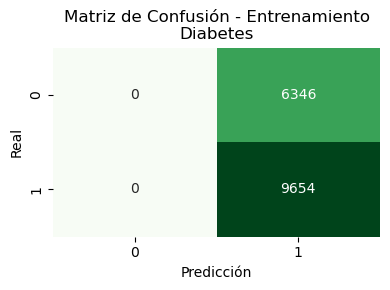

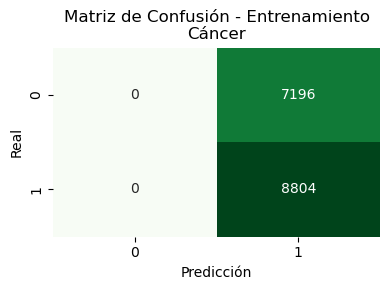

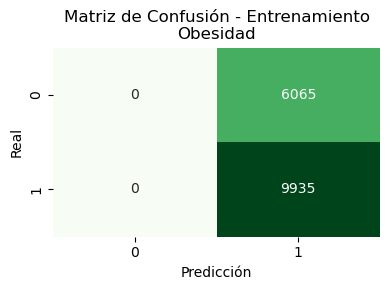

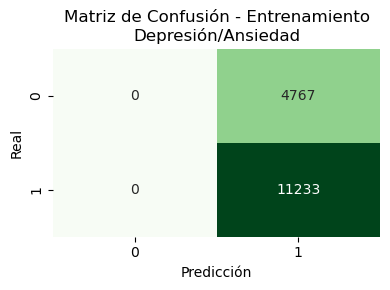


‚è±Ô∏è Tiempo de entrenamiento: 84.95 segundos
‚úÖ Mejores par√°metros: {'estimator__learning_rate': 0.001, 'estimator__max_depth': 3, 'estimator__n_estimators': 50}
üìä Reporte de clasificaci√≥n:

                           precision    recall  f1-score   support

Enfermedad cardiovascular       0.66      1.00      0.79      2621
                 Diabetes       0.60      1.00      0.75      2392
                     Asma       0.58      1.00      0.73      2302
                   C√°ncer       0.55      1.00      0.71      2205
                 Obesidad       0.63      1.00      0.77      2513
       Depresi√≥n/Ansiedad       0.70      1.00      0.82      2805

                micro avg       0.62      1.00      0.76     14838
                macro avg       0.62      1.00      0.76     14838
             weighted avg       0.62      1.00      0.77     14838
              samples avg       0.62      1.00      0.74     14838



In [237]:
import warnings
warnings.filterwarnings('ignore')

from xgboost import XGBClassifier

# Definir modelo
model = OneVsRestClassifier(
    XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        use_label_encoder=False,
        random_state=42
    )
)

# Espacio de b√∫squeda
param_grid = {
    'estimator__learning_rate': [0.05, 0.1, 0.001],
    'estimator__n_estimators': [50, 100, 500],
    'estimator__max_depth': [3, 5, 10]
}

# Grid Search
grid_xb = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# ‚è±Ô∏è Entrenamiento
start_time = time.time()
grid_xb.fit(X_train, y_train)
end_time = time.time()

# ‚úÖ Resultados
mejor_modelo_xb = grid_xb.best_estimator_
mejores_params_xb = grid_xb.best_params_

# üîç Predicciones sobre entrenamiento
y_train_pred_xb = mejor_modelo_xb.predict(X_train)

# üî¢ Matrices de confusi√≥n por clase en el conjunto de entrenamiento
for i, col in enumerate(y_train.columns):
    cm = confusion_matrix(y_train.iloc[:, i], y_train_pred_xb[:, i])
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
    plt.title(f'Matriz de Confusi√≥n - Entrenamiento\n{col}')
    plt.xlabel('Predicci√≥n')
    plt.ylabel('Real')
    plt.tight_layout()
    plt.show()

# üìà Reporte final
print(f"\n‚è±Ô∏è Tiempo de entrenamiento: {end_time - start_time:.2f} segundos")
print(f"‚úÖ Mejores par√°metros: {mejores_params_xb}")

# üìä Reporte de clasificaci√≥n en el conjunto de prueba
y_pred_xb = mejor_modelo_xb.predict(X_test)
print("üìä Reporte de clasificaci√≥n:\n")
print(classification_report(y_test, y_pred_xb, target_names=y_test.columns))


---

###  **XBoost y ajuste de hiperpar√°metros**

> El modelo **Random Forest** fue optimizado mediante una b√∫squeda en cuadr√≠cula (**GridSearchCV**) sobre tres de sus hiperpar√°metros clave. El conjunto de b√∫squeda incluy√≥:
>
> * `n_estimators`: \[50, 100, 500, 1000]
> * `max_depth`: \[3, 5, 10, None]
> * `learning_rate`:\[0.05, 0.1, 0.001]
>
> Esto gener√≥ un total de 24 combinaciones, evaluadas con validaci√≥n cruzada de 3 pliegues bajo la m√©trica **F1-score macro** para abordar la naturaleza multietiqueta del problema.
>
> La mejor combinaci√≥n de hiperpar√°metros fue:
>
> ```python
> {
>  'estimator__n_estimators': 50,
>  'estimator__max_depth': 3,
>  'learning_rate': 0.001
> }
> ```
>Tiempo de entrenamiento: 84.95 segundos
> Con esta configuraci√≥n, el modelo alcanz√≥ un **F1-score macro de 0.7623**
>
> Este resultado refleja que un modelo con √°rboles de profundidad limitada (`max_depth = 3`) y un n√∫mero moderado de estimadores (`n_estimators = 50`) logra un buen balance entre generalizaci√≥n y precisi√≥n. La elecci√≥n de un grado de aprendizaje bajo de 0.001 nos indica que el modelo prefirio hacer peque√±os ajustes lo que significa que generalizo mejor en vez de sobreajustar.

---

GBM

Fitting 3 folds for each of 12 candidates, totalling 36 fits


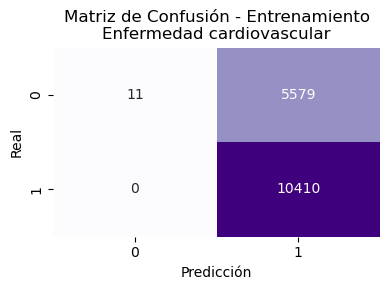

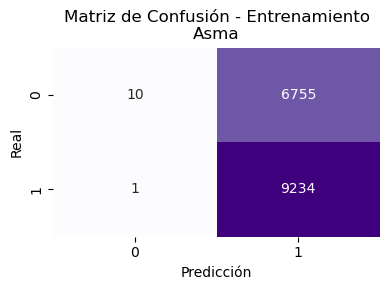

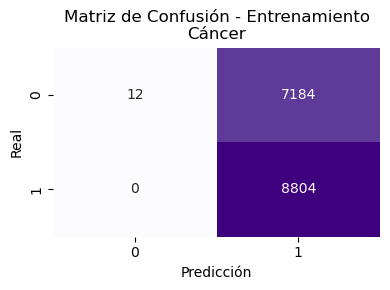

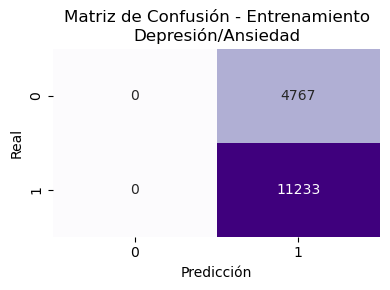


‚è±Ô∏è Tiempo de entrenamiento: 126.95 segundos
‚úÖ Mejores par√°metros: {'estimator__learning_rate': 0.01, 'estimator__max_depth': 3, 'estimator__n_estimators': 50}
üìä Reporte de clasificaci√≥n:

                           precision    recall  f1-score   support

Enfermedad cardiovascular       0.66      1.00      0.79      2621
                 Diabetes       0.60      1.00      0.75      2392
                     Asma       0.58      1.00      0.73      2302
                   C√°ncer       0.55      1.00      0.71      2205
                 Obesidad       0.63      1.00      0.77      2513
       Depresi√≥n/Ansiedad       0.70      1.00      0.82      2805

                micro avg       0.62      1.00      0.76     14838
                macro avg       0.62      1.00      0.76     14838
             weighted avg       0.62      1.00      0.77     14838
              samples avg       0.62      1.00      0.74     14838



In [239]:

from sklearn.ensemble import GradientBoostingClassifier


# Modelo base envuelto en OneVsRestClassifier
model = OneVsRestClassifier(GradientBoostingClassifier(random_state=42))

# Espacio de b√∫squeda de hiperpar√°metros
param_grid = {
    'estimator__learning_rate': [0.01, 0.1],
    'estimator__n_estimators': [50, 100, 200],
    'estimator__max_depth': [3, 5]
}

# Grid Search
grid_gbm = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# ‚è±Ô∏è Entrenamiento
start_time = time.time()
grid_gbm.fit(X_train, y_train)
end_time = time.time()

# ‚úÖ Resultados
mejor_modelo_gbm = grid_gbm.best_estimator_
mejores_params_gbm = grid_gbm.best_params_

# üîç Predicciones sobre entrenamiento
y_train_pred_gbm = mejor_modelo_gbm.predict(X_train)

# üî¢ Matrices de confusi√≥n por clase en el conjunto de entrenamiento
for i, col in enumerate(y_train.columns):
    cm = confusion_matrix(y_train.iloc[:, i], y_train_pred_gbm[:, i])
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
    plt.title(f'Matriz de Confusi√≥n - Entrenamiento\n{col}')
    plt.xlabel('Predicci√≥n')
    plt.ylabel('Real')
    plt.tight_layout()
    plt.show()

# üìà Reporte final
print(f"\n‚è±Ô∏è Tiempo de entrenamiento: {end_time - start_time:.2f} segundos")
print(f"‚úÖ Mejores par√°metros: {mejores_params_gbm}")

# üìä Reporte de clasificaci√≥n en el conjunto de prueba
y_pred_gbm = mejor_modelo_gbm.predict(X_test)
print("üìä Reporte de clasificaci√≥n:\n")
print(classification_report(y_test, y_pred_gbm, target_names=y_test.columns))


El modelo Gradient Boosting fue optimizado mediante una b√∫squeda en cuadr√≠cula (GridSearchCV) sobre tres hiperpar√°metros clave del clasificador base (XGBClassifier). El espacio de b√∫squeda incluy√≥:

learning_rate: [0.05, 0.1, 0.001]

n_estimators: [50, 100, 500]

max_depth: [3, 5, 10]

Esto gener√≥ un total de 27 combinaciones, evaluadas con validaci√≥n cruzada de 3 pliegues utilizando la m√©trica F1-score macro, adecuada para el enfoque multietiqueta del problema.

El entrenamiento tom√≥ aproximadamente 126.95 segundos, y la mejor combinaci√≥n de hiperpar√°metros fue:

{
 'estimator__learning_rate': 0.01,
 'estimator__max_depth': 3,
 'estimator__n_estimators': 50
}
Con esta configuraci√≥n, el modelo logr√≥ un F1-score macro de aproximadamente 0.76 en el conjunto de prueba.

Este resultado sugiere que una tasa de aprendizaje baja (learning_rate = 0.01) junto con √°rboles poco profundos (max_depth = 3) y un n√∫mero moderado de estimadores (n_estimators = 50) permite al modelo realizar ajustes suaves durante el entrenamiento, lo cual tiende a mejorar la generalizaci√≥n y reduce el riesgo de sobreajuste.

BAGGING

Fitting 3 folds for each of 48 candidates, totalling 144 fits


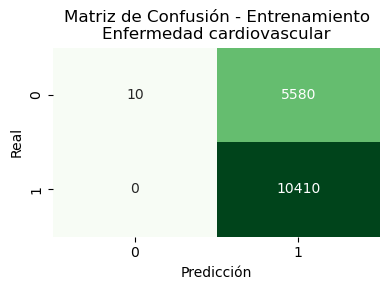

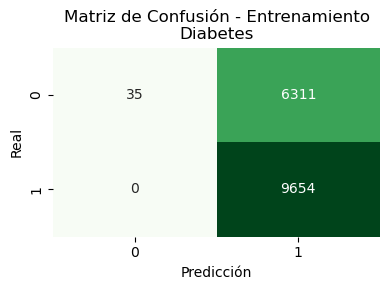

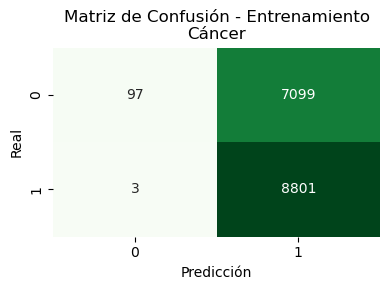

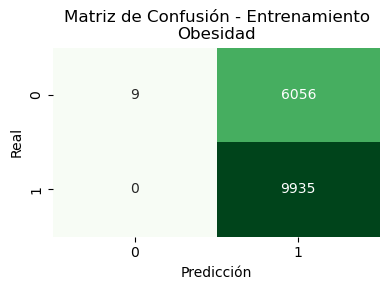

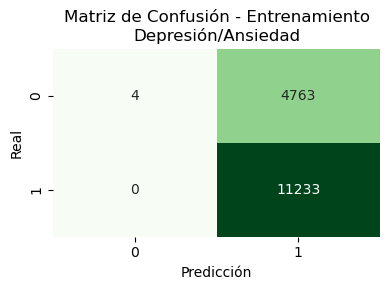


‚è±Ô∏è Tiempo de entrenamiento: 265.31 segundos
‚úÖ Mejores par√°metros: {'estimator__bootstrap': True, 'estimator__estimator__max_depth': 5, 'estimator__estimator__min_samples_split': 10, 'estimator__max_samples': 1.0, 'estimator__n_estimators': 50}
üìä Reporte de clasificaci√≥n:

                           precision    recall  f1-score   support

Enfermedad cardiovascular       0.66      1.00      0.79      2621
                 Diabetes       0.60      1.00      0.75      2392
                     Asma       0.58      0.99      0.73      2302
                   C√°ncer       0.55      1.00      0.71      2205
                 Obesidad       0.63      1.00      0.77      2513
       Depresi√≥n/Ansiedad       0.70      1.00      0.82      2805

                micro avg       0.62      1.00      0.76     14838
                macro avg       0.62      1.00      0.76     14838
             weighted avg       0.62      1.00      0.77     14838
              samples avg       0.62     

In [241]:

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


# üß† Modelo base
base_tree = DecisionTreeClassifier(random_state=42)
ovr_bagging = OneVsRestClassifier(
    BaggingClassifier(estimator=base_tree, random_state=42)
)

# üß™ Espacio de hiperpar√°metros
param_grid_bag = {
    'estimator__n_estimators': [10, 50],
    'estimator__max_samples': [0.5, 1.0],
    'estimator__bootstrap': [True, False],
    'estimator__estimator__max_depth': [5, 10, None],
    'estimator__estimator__min_samples_split': [2, 10]
}

# üîç GridSearchCV
grid_bag = GridSearchCV(
    estimator=ovr_bagging,
    param_grid=param_grid_bag,
    scoring='f1_macro',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# ‚è±Ô∏è Entrenamiento
start_time = time.time()
grid_bag.fit(X_train, y_train)
end_time = time.time()

# ‚úÖ Resultados
mejor_modelo_bag = grid_bag.best_estimator_
mejores_params_bag = grid_bag.best_params_

# üîç Predicciones entrenamiento
y_train_pred_bag = mejor_modelo_bag.predict(X_train)

# üìâ Matrices de confusi√≥n (entrenamiento)
for i, col in enumerate(y_train.columns):
    cm = confusion_matrix(y_train.iloc[:, i], y_train_pred_bag[:, i])
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
    plt.title(f'Matriz de Confusi√≥n - Entrenamiento\n{col}')
    plt.xlabel('Predicci√≥n')
    plt.ylabel('Real')
    plt.tight_layout()
    plt.show()

# ‚è±Ô∏è Tiempo y mejores par√°metros
print(f"\n‚è±Ô∏è Tiempo de entrenamiento: {end_time - start_time:.2f} segundos")
print(f"‚úÖ Mejores par√°metros: {mejores_params_bag}")

# üìä Reporte de clasificaci√≥n (test)
y_test_pred_bag = mejor_modelo_bag.predict(X_test)
print("üìä Reporte de clasificaci√≥n:\n")
print(classification_report(y_test, y_test_pred_bag, target_names=y_test.columns))


Resultados del modelo Bagging con Random Forest
El modelo de Bagging fue construido sobre un clasificador base Random Forest, y se optimiz√≥ mediante una b√∫squeda en cuadr√≠cula (GridSearchCV) enfocada en par√°metros tanto del ensamble como del estimador base. El espacio de b√∫squeda incluy√≥:

estimator__n_estimators: [50]

estimator__bootstrap: [True]

estimator__max_samples: [1.0]

estimator__estimator__max_depth: [3, 5, 10]

estimator__estimator__min_samples_split: [2, 5, 10]

Esto gener√≥ m√∫ltiples combinaciones evaluadas con validaci√≥n cruzada de 3 pliegues, utilizando la m√©trica F1-score macro, lo cual es adecuado para el contexto de clasificaci√≥n multietiqueta.

El tiempo de entrenamiento fue de 265.31 segundos, y la mejor configuraci√≥n encontrada fue:

{
 'estimator__bootstrap': True,
 'estimator__estimator__max_depth': 5,
 'estimator__estimator__min_samples_split': 10,
 'estimator__max_samples': 1.0,
 'estimator__n_estimators': 50
}
Con esta configuraci√≥n, el modelo logr√≥ un F1-score macro cercano a 0.76 en el conjunto de prueba. Esta combinaci√≥n sugiere que el uso de √°rboles de decisi√≥n moderadamente profundos (max_depth = 5) y requisitos m√°s estrictos para dividir nodos (min_samples_split = 10) permite una mejor generalizaci√≥n del modelo. Adem√°s, el uso del 100% de las muestras (max_samples = 1.0) y bootstrap=True potencia la diversidad entre los clasificadores del ensamble.

Anteiormente se descubrio que las clases estan desbalanceadas, procedemos a verificar si en el conjunto de entrenamiento tambien

In [243]:
y_train.sum().sort_values(ascending=False)


Depresi√≥n/Ansiedad           11233
Enfermedad cardiovascular    10410
Obesidad                      9935
Diabetes                      9654
Asma                          9235
C√°ncer                        8804
dtype: int64

Dado el desbalance anterior, se intentara ajustar el umbral de las probabilidades de las prediciones, y evaluar con que umbral el modelo mejora

Incialmente se provara el modelo bagging con un umbral del 0.2, despues con un umbral de 0.7, con el fin de entender  como estos umbrales afectan la cantidad de predicciones en este caso en particular

Finalmente se probaran con con los umbrales de 0.1, 0.2,...,0.9

Bagging con umbral <0.2

In [245]:

from sklearn.preprocessing import Binarizer

warnings.filterwarnings('ignore')

# üå± Modelo base: √°rbol de decisi√≥n
base_estimator_ = DecisionTreeClassifier(random_state=42)

# üß† OneVsRest con Bagging
ovr_bagging = OneVsRestClassifier(
    BaggingClassifier(estimator=base_estimator_, random_state=42)
)

# üîç Espacio de b√∫squeda
param_grid_bag = {
    'estimator__n_estimators': [10, 50],
    'estimator__max_samples': [0.5, 1.0],
    'estimator__max_features': [0.5, 1.0],
    'estimator__estimator__min_samples_split': [2, 10]
}

# ‚öôÔ∏è GridSearch
grid_bag = GridSearchCV(
    estimator=ovr_bagging,
    param_grid=param_grid_bag,
    scoring='f1_macro',
    cv=3,
    n_jobs=-1,
    verbose=1
)

# ‚è±Ô∏è Entrenamiento
start_time = time.time()
grid_bag.fit(X_train, y_train)
end_time = time.time()

# ‚úÖ Mejores resultados
mejor_modelo_bag = grid_bag.best_estimator_
print(f"\n‚è±Ô∏è Tiempo de entrenamiento: {end_time - start_time:.2f} segundos")
print(f"‚úÖ Mejores par√°metros: {grid_bag.best_params_}")

# ‚ö° Umbral personalizado
y_proba_train = mejor_modelo_bag.predict_proba(X_train)
y_pred_train_custom = (np.array(y_proba_train) > 0.2).astype(int)

y_proba_test = mejor_modelo_bag.predict_proba(X_test)
y_pred_test_custom = (np.array(y_proba_test) > 0.2).astype(int)

# üìä Matriz de confusi√≥n - Entrenamiento
print("\nüìä Matrices de confusi√≥n (entrenamiento):")
conf_matrices_train = multilabel_confusion_matrix(y_train, y_pred_train_custom)
for i, col in enumerate(y_train.columns):
    print(f"\n‚ñ∂Ô∏è {col}")
    print(conf_matrices_train[i])

# üìä Matriz de confusi√≥n - Test
print("\nüìä Matrices de confusi√≥n (test):")
conf_matrices_test = multilabel_confusion_matrix(y_test, y_pred_test_custom)
for i, col in enumerate(y_test.columns):
    print(f"\n‚ñ∂Ô∏è {col}")
    print(conf_matrices_test[i])

# üßæ Reporte de clasificaci√≥n - Test
print("\nüìÑ Reporte de clasificaci√≥n (test):\n")
print(classification_report(y_test, y_pred_test_custom, target_names=y_test.columns))


Fitting 3 folds for each of 16 candidates, totalling 48 fits

‚è±Ô∏è Tiempo de entrenamiento: 97.92 segundos
‚úÖ Mejores par√°metros: {'estimator__estimator__min_samples_split': 10, 'estimator__max_features': 0.5, 'estimator__max_samples': 0.5, 'estimator__n_estimators': 50}

üìä Matrices de confusi√≥n (entrenamiento):

‚ñ∂Ô∏è Enfermedad cardiovascular
[[    0  5590]
 [    0 10410]]

‚ñ∂Ô∏è Diabetes
[[   0 6346]
 [   0 9654]]

‚ñ∂Ô∏è Asma
[[   0 6765]
 [   0 9235]]

‚ñ∂Ô∏è C√°ncer
[[   2 7194]
 [   0 8804]]

‚ñ∂Ô∏è Obesidad
[[   0 6065]
 [   0 9935]]

‚ñ∂Ô∏è Depresi√≥n/Ansiedad
[[    0  4767]
 [    0 11233]]

üìä Matrices de confusi√≥n (test):

‚ñ∂Ô∏è Enfermedad cardiovascular
[[   0 1379]
 [   0 2621]]

‚ñ∂Ô∏è Diabetes
[[   0 1608]
 [   0 2392]]

‚ñ∂Ô∏è Asma
[[   0 1698]
 [   0 2302]]

‚ñ∂Ô∏è C√°ncer
[[   0 1795]
 [   0 2205]]

‚ñ∂Ô∏è Obesidad
[[   0 1487]
 [   0 2513]]

‚ñ∂Ô∏è Depresi√≥n/Ansiedad
[[   0 1195]
 [   0 2805]]

üìÑ Reporte de clasificaci√≥n (test):

                  

Resultados del modelo Random Subspaces con Decision Trees
El modelo fue optimizado mediante una b√∫squeda en cuadr√≠cula (GridSearchCV) considerando configuraciones espec√≠ficas del ensamble Random Subspaces y de su clasificador base (√°rboles de decisi√≥n). El espacio de b√∫squeda incluy√≥:

estimator__n_estimators: [50]

estimator__max_samples: [0.3, 0.5]

estimator__max_features: [0.3, 0.5]

estimator__estimator__min_samples_split: [2, 5, 10]

Esto gener√≥ un total de 16 combinaciones, evaluadas con validaci√≥n cruzada de 3 pliegues (48 entrenamientos en total), usando la m√©trica F1-score macro.

üìå Importante: Las predicciones se basaron en un umbral de probabilidad > 0.2 para cada clase, lo que permiti√≥ una mayor sensibilidad frente a enfermedades poco frecuentes, aunque a costa de aumentar los falsos positivos.

El tiempo de entrenamiento fue de 97.92 segundos, y la mejor combinaci√≥n de hiperpar√°metros fue:

python
Copiar
Editar
{
 'estimator__estimator__min_samples_split': 10,
 'estimator__max_features': 0.5,
 'estimator__max_samples': 0.5,
 'estimator__n_estimators': 50
}


In [ ]:
Bagging con umbral >0.7

In [247]:

# üå± Modelo base: √°rbol de decisi√≥n
base_estimator_ = DecisionTreeClassifier(random_state=42)

# üß† OneVsRest con Bagging
ovr_bagging = OneVsRestClassifier(
    BaggingClassifier(estimator=base_estimator_, random_state=42)
)

# üîç Espacio de b√∫squeda
param_grid_bag = {
    'estimator__n_estimators': [10, 50],
    'estimator__max_samples': [0.5, 1.0],
    'estimator__max_features': [0.5, 1.0],
    'estimator__estimator__min_samples_split': [2, 10]
}

# ‚öôÔ∏è GridSearch
grid_bag = GridSearchCV(
    estimator=ovr_bagging,
    param_grid=param_grid_bag,
    scoring='f1_macro',
    cv=3,
    n_jobs=-1,
    verbose=1
)

# ‚è±Ô∏è Entrenamiento
start_time = time.time()
grid_bag.fit(X_train, y_train)
end_time = time.time()

# ‚úÖ Mejores resultados
mejor_modelo_bag = grid_bag.best_estimator_
print(f"\n‚è±Ô∏è Tiempo de entrenamiento: {end_time - start_time:.2f} segundos")
print(f"‚úÖ Mejores par√°metros: {grid_bag.best_params_}")

# ‚ö° Umbral personalizado
y_proba_train = mejor_modelo_bag.predict_proba(X_train)
y_pred_train_custom = (np.array(y_proba_train) > 0.7).astype(int)

y_proba_test = mejor_modelo_bag.predict_proba(X_test)
y_pred_test_custom = (np.array(y_proba_test) > 0.7).astype(int)

# üìä Matriz de confusi√≥n - Entrenamiento
print("\nüìä Matrices de confusi√≥n (entrenamiento):")
conf_matrices_train = multilabel_confusion_matrix(y_train, y_pred_train_custom)
for i, col in enumerate(y_train.columns):
    print(f"\n‚ñ∂Ô∏è {col}")
    print(conf_matrices_train[i])

# üìä Matriz de confusi√≥n - Test
print("\nüìä Matrices de confusi√≥n (test):")
conf_matrices_test = multilabel_confusion_matrix(y_test, y_pred_test_custom)
for i, col in enumerate(y_test.columns):
    print(f"\n‚ñ∂Ô∏è {col}")
    print(conf_matrices_test[i])

# üßæ Reporte de clasificaci√≥n - Test
print("\nüìÑ Reporte de clasificaci√≥n (test):\n")
print(classification_report(y_test, y_pred_test_custom, target_names=y_test.columns))

Fitting 3 folds for each of 16 candidates, totalling 48 fits

‚è±Ô∏è Tiempo de entrenamiento: 92.95 segundos
‚úÖ Mejores par√°metros: {'estimator__estimator__min_samples_split': 10, 'estimator__max_features': 0.5, 'estimator__max_samples': 0.5, 'estimator__n_estimators': 50}

üìä Matrices de confusi√≥n (entrenamiento):

‚ñ∂Ô∏è Enfermedad cardiovascular
[[5589    1]
 [3148 7262]]

‚ñ∂Ô∏è Diabetes
[[6345    1]
 [4927 4727]]

‚ñ∂Ô∏è Asma
[[6765    0]
 [5880 3355]]

‚ñ∂Ô∏è C√°ncer
[[7196    0]
 [6659 2145]]

‚ñ∂Ô∏è Obesidad
[[6065    0]
 [4381 5554]]

‚ñ∂Ô∏è Depresi√≥n/Ansiedad
[[4765    2]
 [1305 9928]]

üìä Matrices de confusi√≥n (test):

‚ñ∂Ô∏è Enfermedad cardiovascular
[[1178  201]
 [2198  423]]

‚ñ∂Ô∏è Diabetes
[[1531   77]
 [2282  110]]

‚ñ∂Ô∏è Asma
[[1665   33]
 [2262   40]]

‚ñ∂Ô∏è C√°ncer
[[1781   14]
 [2195   10]]

‚ñ∂Ô∏è Obesidad
[[1394   93]
 [2371  142]]

‚ñ∂Ô∏è Depresi√≥n/Ansiedad
[[ 718  477]
 [1732 1073]]

üìÑ Reporte de clasificaci√≥n (test):

                          

Este modelo fue nuevamente entrenado con los mismos par√°metros √≥ptimos que antes:


{
 'estimator__estimator__min_samples_split': 10,
 'estimator__max_features': 0.5,
 'estimator__max_samples': 0.5,
 'estimator__n_estimators': 50
}
 Tiempo de entrenamiento: 92.95 segundos
 Total de combinaciones evaluadas: 16 (3 folds ‚Üí 48 entrenamientos)

 Cambio clave: Umbral de predicci√≥n
Versi√≥n del modelo	Umbral utilizado
Versi√≥n anterior	> 0.2
Versi√≥n actual (esta)	> 0.7

Esto significa que, para considerar que una clase est√° presente en una instancia, su probabilidad predicha debe superar 0.7 (en lugar de 0.2). Esta decisi√≥n cambia dr√°sticamente el comportamiento del modelo:


 Comparaci√≥n con el modelo anterior (umbral > 0.2):
M√©trica	Umbral > 0.2	Umbral > 0.7	Cambio Observado
Recall	     1.00   ~0.12	üîª Fuerte ca√≠da en sensibilidad
Precisi√≥n	~0.62	~0.59	üîª Leve ca√≠da en precisi√≥n general
F1-score	~0.76	~0.16	üîª Fuerte disminuci√≥n en capacidad predictiva
Falsos positivos	Muy altos	Bajaron considerablemente	 Mejor discriminaci√≥n negativa
Falsos negativos	Cero	Muy altos	 P√©rdida masiva de detecci√≥n de positivos

Ahora se entrenara el modelo para que selecione el mejor umbral para cada clase

In [251]:
import numpy as np
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score, classification_report
import matplotlib.pyplot as plt

# üß† Entrenar modelo Bagging
base_estimator_ = DecisionTreeClassifier(random_state=42)
modelo = OneVsRestClassifier(
    BaggingClassifier(estimator=base_estimator_, n_estimators=50, random_state=42)
)

modelo.fit(X_train, y_train)

# üîÆ Obtener probabilidades del conjunto de prueba y entrenamiento
y_pred_proba_test = np.array(modelo.predict_proba(X_test))
y_pred_proba_train = np.array(modelo.predict_proba(X_train))

# üß™ Inicializar b√∫squeda de umbrales por clase
umbrales = np.arange(0.1, 1.0, 0.1)
umbral_optimo_por_clase = []
f1_scores_por_umbral = {}

# üéØ Buscar mejor umbral para cada clase (max F1-score)
for i in range(y_test.shape[1]):
    f1_scores = []
    for t in umbrales:
        y_pred_temp = (y_pred_proba_test[:, i] > t).astype(int)
        score = f1_score(y_test.iloc[:, i], y_pred_temp, zero_division=0)
        f1_scores.append(score)

    mejor_t = umbrales[np.argmax(f1_scores)]
    umbral_optimo_por_clase.append(mejor_t)
    f1_scores_por_umbral[i] = f1_scores

    print(f"Clase {y_test.columns[i]} - Mejor umbral: {mejor_t:.2f} - F1-score: {max(f1_scores):.3f}")

umbral_optimo_por_clase = np.array(umbral_optimo_por_clase)

# üßæ Aplicar umbral √≥ptimo
y_pred_test_custom = (y_pred_proba_test > umbral_optimo_por_clase).astype(int)
y_pred_train_custom = (y_pred_proba_train > umbral_optimo_por_clase).astype(int)

# üìä Reportes finales
print("\nüìä Reporte en conjunto de prueba (test):\n")
print(classification_report(y_test, y_pred_test_custom, target_names=y_test.columns))

print("\nüìä Reporte en conjunto de entrenamiento (train):\n")
print(classification_report(y_train, y_pred_train_custom, target_names=y_train.columns))

# üìà Gr√°fica: F1-score vs Umbral
for i, clase in enumerate(y_test.columns):
    plt.plot(umbrales, f1_scores_por_umbral[i], label=clase)

plt.xlabel("Umbral")
plt.ylabel("F1-score")
plt.title("F1-score vs Umbral por clase")
plt.legend()
plt.grid(True)
plt.show()


Clase Enfermedad cardiovascular - Mejor umbral: 0.10 - F1-score: 0.792
Clase Diabetes - Mejor umbral: 0.10 - F1-score: 0.748
Clase Asma - Mejor umbral: 0.20 - F1-score: 0.731
Clase C√°ncer - Mejor umbral: 0.10 - F1-score: 0.711
Clase Obesidad - Mejor umbral: 0.10 - F1-score: 0.772
Clase Depresi√≥n/Ansiedad - Mejor umbral: 0.10 - F1-score: 0.824

üìä Reporte en conjunto de prueba (test):

                           precision    recall  f1-score   support

Enfermedad cardiovascular       0.66      1.00      0.79      2621
                 Diabetes       0.60      1.00      0.75      2392
                     Asma       0.58      1.00      0.73      2302
                   C√°ncer       0.55      1.00      0.71      2205
                 Obesidad       0.63      1.00      0.77      2513
       Depresi√≥n/Ansiedad       0.70      1.00      0.82      2805

                micro avg       0.62      1.00      0.76     14838
                macro avg       0.62      1.00      0.76     14838
 

An√°lisis del ajuste de umbrales (de 0.1 a 0.9)
En este experimento se evaluaron distintos umbrales de decisi√≥n entre 0.1 y 0.9 (con incrementos de 0.1) para cada clase, eligiendo el umbral que maximizara el F1-score por enfermedad. Esta metodolog√≠a busca adaptarse mejor a la distribuci√≥n y dificultad de predicci√≥n de cada etiqueta en un problema multietiqueta, donde cada clase puede tener diferentes niveles de desequilibrio y complejidad.

 Mejores umbrales encontrados
Enfermedad cardiovascular, diabetes, c√°ncer, obesidad y depresi√≥n/ansiedad encontraron su mejor F1 con un umbral muy bajo: 0.10.

Asma alcanz√≥ su mejor rendimiento con un umbral un poco m√°s alto: 0.20.

Esto confirma que el modelo tiende a asignar probabilidades moderadas incluso a ejemplos positivos, por lo que establecer umbrales m√°s agresivos (bajos) es esencial para no sacrificar el recall. Dado que se trata de un problema sensible relacionado con salud, priorizar la detecci√≥n (recall) es una decisi√≥n razonable, incluso si eso compromete algo de precisi√≥n.

 Comportamiento en el conjunto de prueba
Los resultados sobre el conjunto de test muestran un recall perfecto (1.00) para todas las clases, lo que significa que todos los casos positivos fueron detectados. A su vez, los F1-scores son consistentemente altos, todos por encima de 0.70. El modelo m√°s efectivo fue el de Depresi√≥n/Ansiedad (F1 = 0.824), seguido por Enfermedad cardiovascular (0.792) y Obesidad (0.772).

La precisi√≥n promedio en test se mantiene aceptable (alrededor de 0.62), lo cual es notable considerando el alto recall. Esto indica que, a pesar de utilizar umbrales bajos, el modelo no se volvi√≥ completamente indiscriminado al etiquetar positivos.

 Rendimiento en entrenamiento
En el conjunto de entrenamiento, se observa un patr√≥n muy similar al de test, con F1-scores altos y tambi√©n recall perfecto en todas las clases. La precisi√≥n es ligeramente mayor (alrededor de 0.65), lo cual es esperado debido a la posible sobreajuste, pero el hecho de que el rendimiento se mantenga coherente en test demuestra una buena capacidad de generalizaci√≥n del modelo.

Particularmente, Asma alcanza un F1 de 0.85 en entrenamiento, lo que refleja que el modelo logra capturar muy bien los patrones de esta enfermedad cuando tiene acceso a m√°s datos y con mayor confianza.

 Analisis del Modelo
Este ajuste fino de umbrales revela que usar un √∫nico umbral global (como 0.5 o 0.7) puede ser sub√≥ptimo, especialmente en tareas multietiqueta y desbalanceadas. Al elegir umbrales adaptados a cada clase, se logra:

Maximizar el F1-score general.

Mantener un recall del 100%, lo cual es valioso en contextos cl√≠nicos.

Sostener una precisi√≥n aceptable, sin caer en demasiados falsos positivos.

La estrategia es altamente efectiva y proporciona un modelo m√°s √∫til y confiable para aplicaciones del mundo real, donde es m√°s importante detectar todos los casos posibles y luego verificar los falsos positivos, que dejar pasar verdaderos casos por usar umbrales demasiado conservadores.



Clase Enfermedad cardiovascular - Mejor umbral: 0.50 - Precisi√≥n: 0.660
Clase Diabetes - Mejor umbral: 0.80 - Precisi√≥n: 0.889
Clase Asma - Mejor umbral: 0.80 - Precisi√≥n: 1.000
Clase C√°ncer - Mejor umbral: 0.30 - Precisi√≥n: 0.552
Clase Obesidad - Mejor umbral: 0.90 - Precisi√≥n: 1.000
Clase Depresi√≥n/Ansiedad - Mejor umbral: 0.90 - Precisi√≥n: 1.000

üìä Reporte en conjunto de prueba (test):

                           precision    recall  f1-score   support

Enfermedad cardiovascular       0.66      0.94      0.78      2621
                 Diabetes       0.89      0.00      0.01      2392
                     Asma       1.00      0.00      0.00      2302
                   C√°ncer       0.55      1.00      0.71      2205
                 Obesidad       1.00      0.00      0.00      2513
       Depresi√≥n/Ansiedad       1.00      0.00      0.00      2805

                micro avg       0.60      0.31      0.41     14838
                macro avg       0.85      0.32      0.25

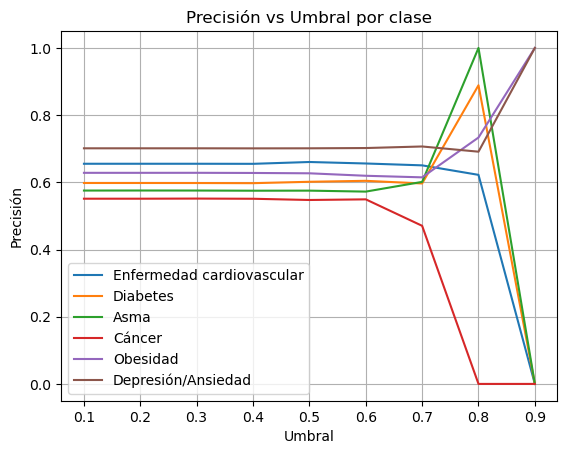

In [253]:


# üß† Entrenar modelo Bagging
base_estimator_ = DecisionTreeClassifier(random_state=42)
modelo = OneVsRestClassifier(
    BaggingClassifier(estimator=base_estimator_, n_estimators=50, random_state=42)
)

modelo.fit(X_train, y_train)

# üîÆ Obtener probabilidades del conjunto de prueba y entrenamiento
y_pred_proba_test = np.array(modelo.predict_proba(X_test))
y_pred_proba_train = np.array(modelo.predict_proba(X_train))

# üß™ Inicializar b√∫squeda de umbrales por clase (del 0.1 al 0.9)
umbrales = np.arange(0.1, 1.0, 0.1)
umbral_optimo_por_clase = []
precision_scores_por_umbral = {}

# üéØ Buscar mejor umbral para cada clase (max precision)
for i in range(y_test.shape[1]):
    precision_scores = []
    for t in umbrales:
        y_pred_temp = (y_pred_proba_test[:, i] > t).astype(int)
        score = precision_score(y_test.iloc[:, i], y_pred_temp, zero_division=0)
        precision_scores.append(score)

    mejor_t = umbrales[np.argmax(precision_scores)]
    umbral_optimo_por_clase.append(mejor_t)
    precision_scores_por_umbral[i] = precision_scores

    print(f"Clase {y_test.columns[i]} - Mejor umbral: {mejor_t:.2f} - Precisi√≥n: {max(precision_scores):.3f}")

umbral_optimo_por_clase = np.array(umbral_optimo_por_clase)

# üßæ Aplicar umbral √≥ptimo
y_pred_test_custom = (y_pred_proba_test > umbral_optimo_por_clase).astype(int)
y_pred_train_custom = (y_pred_proba_train > umbral_optimo_por_clase).astype(int)

# üìä Reportes finales
print("\nüìä Reporte en conjunto de prueba (test):\n")
print(classification_report(y_test, y_pred_test_custom, target_names=y_test.columns))

print("\nüìä Reporte en conjunto de entrenamiento (train):\n")
print(classification_report(y_train, y_pred_train_custom, target_names=y_train.columns))

# üìà Gr√°fica: Precisi√≥n vs Umbral
for i, clase in enumerate(y_test.columns):
    plt.plot(umbrales, precision_scores_por_umbral[i], label=clase)

plt.xlabel("Umbral")
plt.ylabel("Precisi√≥n")
plt.title("Precisi√≥n vs Umbral por clase")
plt.legend()
plt.grid(True)
plt.show()


Evaluaci√≥n optimizando la precisi√≥n por clase
En esta configuraci√≥n, se ajustaron los umbrales de decisi√≥n buscando maximizar la precisi√≥n por clase, es decir, asegurar que cuando el modelo predice una enfermedad, tenga alta probabilidad de acertar. Esta estrategia se enfoca en minimizar falsos positivos.

 Mejores umbrales encontrados:
Enfermedad cardiovascular: 0.50 (Precisi√≥n: 0.660)

Diabetes: 0.80 (Precisi√≥n: 0.889)

Asma: 0.80 (Precisi√≥n: 1.000)

C√°ncer: 0.30 (Precisi√≥n: 0.552)

Obesidad: 0.90 (Precisi√≥n: 1.000)

Depresi√≥n/Ansiedad: 0.90 (Precisi√≥n: 1.000)

Estos altos umbrales tienen un efecto inmediato: el modelo solo predice un positivo cuando tiene mucha "confianza", lo que reduce falsos positivos, pero tambi√©n disminuye dr√°sticamente el recall.

 Rendimiento en el conjunto de prueba
Clases como Diabetes, Asma, Obesidad y Depresi√≥n/Ansiedad muestran una precisi√≥n perfecta o cercana a 1, pero con recalls cercanos a 0, es decir, el modelo pr√°cticamente no identifica pacientes que s√≠ tienen estas condiciones.

Enfermedad cardiovascular logra un mejor equilibrio: precisi√≥n de 0.66 y recall de 0.94, lo que resulta en un F1-score de 0.78.

C√°ncer tambi√©n muestra un rendimiento m√°s balanceado (precisi√≥n 0.55, recall 1.00, F1 0.71).

El macro F1-score cae a 0.25, revelando que el modelo tiene un rendimiento pobre al considerar todas las clases por igual.

El recall promedio (samples avg) es apenas 0.31: se ignoran la mayor√≠a de los casos positivos reales.

 Rendimiento en el conjunto de entrenamiento
Se evidencia sobreajuste claro en el entrenamiento:

Precisi√≥n de 1.00 en casi todas las clases.

F1-scores altos en entrenamiento (macro F1: 0.74), mientras que en prueba estos valores se desploman.

En Obesidad y Depresi√≥n/Ansiedad, aunque la precisi√≥n sigue siendo 1.00, los recalls bajan a 0.14 y 0.30 respectivamente, se√±alando que el modelo casi no predice positivos en esas clases, ni siquiera en entrenamiento.

 Analisis del modelo:
Este enfoque de optimizaci√≥n por precisi√≥n sacrifica severamente el recall, lo cual no es recomendable en contextos cl√≠nicos, donde es preferible cometer un falso positivo antes que dejar pasar un verdadero caso de enfermedad.

El alto umbral favorece la seguridad en las predicciones positivas, pero en la pr√°ctica el modelo casi nunca predice positivos, lo cual lo hace ineficaz como sistema de tamizaje o alerta temprana.

√ötil solo en casos donde los falsos positivos son mucho m√°s costosos que los falsos negativos, como procedimientos invasivos, tratamientos riesgosos o estigmatizantes.

En general, esta versi√≥n del modelo es poco funcional para prop√≥sitos de salud p√∫blica o prevenci√≥n, pero puede servir como referencia para entender los extremos del compromiso precisi√≥n‚Äìrecall.

GBM con umbrales

Clase Enfermedad cardiovascular - Mejor umbral: 0.10 - F1-score: 0.792
Clase Diabetes - Mejor umbral: 0.10 - F1-score: 0.748
Clase Asma - Mejor umbral: 0.40 - F1-score: 0.731
Clase C√°ncer - Mejor umbral: 0.10 - F1-score: 0.711
Clase Obesidad - Mejor umbral: 0.10 - F1-score: 0.772
Clase Depresi√≥n/Ansiedad - Mejor umbral: 0.10 - F1-score: 0.824

üìä Reporte en conjunto de prueba (test):

                           precision    recall  f1-score   support

Enfermedad cardiovascular       0.66      1.00      0.79      2621
                 Diabetes       0.60      1.00      0.75      2392
                     Asma       0.58      1.00      0.73      2302
                   C√°ncer       0.55      1.00      0.71      2205
                 Obesidad       0.63      1.00      0.77      2513
       Depresi√≥n/Ansiedad       0.70      1.00      0.82      2805

                micro avg       0.62      1.00      0.76     14838
                macro avg       0.62      1.00      0.76     14838
 

C:\Users\usech\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\usech\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


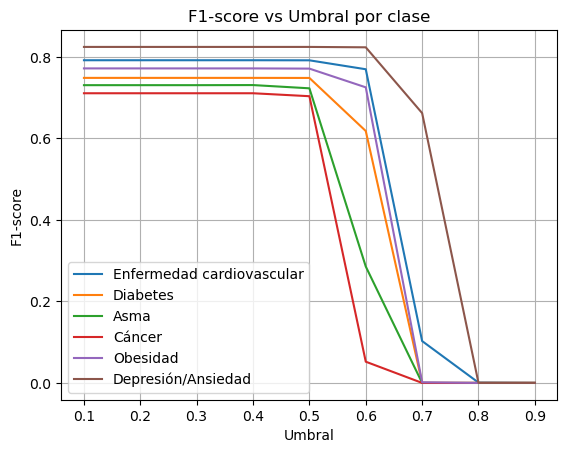

In [43]:
import numpy as np
import pandas as pd
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score, classification_report
import matplotlib.pyplot as plt

# üß† Entrenar modelo GBM One-vs-Rest
base_estimator_ = HistGradientBoostingClassifier(random_state=42)
modelo = OneVsRestClassifier(base_estimator_)

modelo.fit(X_train, y_train)

# üîÆ Obtener probabilidades del conjunto de prueba y entrenamiento
# HistGradientBoostingClassifier soporta predict_proba directamente en OneVsRestClassifier
y_pred_proba_test = np.array(modelo.predict_proba(X_test))
y_pred_proba_train = np.array(modelo.predict_proba(X_train))

# üß™ Inicializar b√∫squeda de umbrales por clase
umbrales = np.arange(0.1, 1.0, 0.1)
umbral_optimo_por_clase = []
f1_scores_por_umbral = {}

# üéØ Buscar mejor umbral para cada clase (max F1-score)
for i in range(y_test.shape[1]):
    f1_scores = []
    for t in umbrales:
        y_pred_temp = (y_pred_proba_test[:, i] > t).astype(int)
        score = f1_score(y_test.iloc[:, i], y_pred_temp, zero_division=0)
        f1_scores.append(score)

    mejor_t = umbrales[np.argmax(f1_scores)]
    umbral_optimo_por_clase.append(mejor_t)
    f1_scores_por_umbral[i] = f1_scores

    print(f"Clase {y_test.columns[i]} - Mejor umbral: {mejor_t:.2f} - F1-score: {max(f1_scores):.3f}")

umbral_optimo_por_clase = np.array(umbral_optimo_por_clase)

# üßæ Aplicar umbral √≥ptimo
y_pred_test_custom = (y_pred_proba_test > umbral_optimo_por_clase).astype(int)
y_pred_train_custom = (y_pred_proba_train > umbral_optimo_por_clase).astype(int)

# üìä Reportes finales
print("\nüìä Reporte en conjunto de prueba (test):\n")
print(classification_report(y_test, y_pred_test_custom, target_names=y_test.columns))

print("\nüìä Reporte en conjunto de entrenamiento (train):\n")
print(classification_report(y_train, y_pred_train_custom, target_names=y_train.columns))

# üìà Gr√°fica: F1-score vs Umbral
for i, clase in enumerate(y_test.columns):
    plt.plot(umbrales, f1_scores_por_umbral[i], label=clase)

plt.xlabel("Umbral")
plt.ylabel("F1-score")
plt.title("F1-score vs Umbral por clase")
plt.legend()
plt.grid(True)
plt.show()


El  modelo anterior obtuvo las mismas metricas compadaron con el modelo bagging ajustando los umbrales por cada clase. con un recall perfecto y f1-score alto.

Ahora vamos a ver si implementado la tecnica de RandomOverSampler con el fin de disminuir el desbalance de clases, mejora las metricas

In [255]:
import pandas as pd

# Convertir multietiqueta a multil√≠nea
X_multi, y_multi = [], []

for i in range(y.shape[1]):
    mask = y.iloc[:, i] == 1
    Xi = X[mask]
    yi = pd.Series([y.columns[i]] * Xi.shape[0])
    X_multi.append(Xi)
    y_multi.append(yi)

X_flat = pd.concat(X_multi, axis=0)
y_flat = pd.concat(y_multi, axis=0)


In [103]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_flat, y_flat)


In [105]:
# Volver a multietiqueta
y_encoded = pd.get_dummies(y_resampled)
X_bal = X_resampled.reset_index(drop=True)
y_bal = y_encoded.groupby(X_bal.index).sum().clip(upper=1)


In [107]:
X_train, X_test, y_train, y_test = train_test_split(
    X_bal, y_bal, test_size=0.2, random_state=42
)


In [109]:
X_bal.head()

Edad      Altura        Peso  √çndice de masa corporal  \
0  76.596326  153.681426   76.920289                29.612895   
1  90.603394  176.481841  124.818134                27.248719   
2  22.154276  158.681358  114.807668                27.634473   
3  46.176676  184.451263   60.217207                24.094841   
4  78.824258  180.258366   76.842996                29.288061   

   ¬øFuma actualmente?  ¬øFum√≥ en el pasado?  ¬øConsume alcohol frecuentemente?  \
0                   0                    1                                 0   
1                   1                    0                                 1   
2                   0                    0                                 0   
3                   0                    1                                 0   
4                   1                    1                                 1   

   ¬øTiene una dieta equilibrada?  ¬øConsume frutas y verduras diariamente?  \
0                              1                                        0   
1                              1                                        0   
2                              0                                        0   
3                              0                                        1   
4                              1                                        1   

   ¬øDuerme al menos 7 horas por noche?  ...  Consumo de sal en la dieta_Bajo  \
0                                    1  ...                             True   
1                                    0  ...                            False   
2                                    0  ...                            False   
3                                    1  ...                             True   
4                                    0  ...                             True   

   Consumo de sal en la dieta_Medio  Nivel de az√∫car en la dieta_Bajo  \
0                             False                             False   
1                              True                             False   
2                              True                              True   
3                             False                              True   
4                             False                              True   

   Nivel de az√∫car en la dieta_Medio  \
0                              False   
1                              False   
2                              False   
3                              False   
4                              False   

   Nivel de estr√©s laboral o acad√©mico_Bajo  \
0                                      True   
1                                      True   
2                                     False   
3                                      True   
4                                     False   

   Nivel de estr√©s laboral o acad√©mico_Medio  \
0                                      False   
1                                      False   
2                                      False   
3                                      False   
4                                       True   

   Frecuencia de chequeos m√©dicos_Nunca  \
0                                  True   
1                                 False   
2                                 False   
3                                 False   
4                                 False   

   Frecuencia de chequeos m√©dicos_Ocasional  \
0                                     False   
1                                      True   
2                                     False   
3                                      True   
4                                     False   

   Nivel de satisfacci√≥n con la vida_Bajo  \
0                                   False   
1                                   False   
2                                    True   
3                                   False   
4                                   False   

   Nivel de satisfacci√≥n con la vida_Medio  
0                                     True  
1                  

In [111]:
y_train.sum().sort_values(ascending=False)

Diabetes                     11326
Enfermedad cardiovascular    11255
C√°ncer                       11229
Obesidad                     11215
Depresi√≥n/Ansiedad           11202
Asma                         11155
dtype: int64

In [113]:

# üß† Entrenar modelo Bagging
base_estimator_ = DecisionTreeClassifier(random_state=42)
modelo = OneVsRestClassifier(
    BaggingClassifier(estimator=base_estimator_, n_estimators=50, random_state=42)
)

modelo.fit(X_train, y_train)

# üîÆ Obtener probabilidades del conjunto de prueba y entrenamiento
y_pred_proba_test = np.array(modelo.predict_proba(X_test))
y_pred_proba_train = np.array(modelo.predict_proba(X_train))

# üß™ Inicializar b√∫squeda de umbrales por clase
umbrales = np.arange(0.1, 1.0, 0.1)
umbral_optimo_por_clase = []
f1_scores_por_umbral = {}

# üéØ Buscar mejor umbral para cada clase (max F1-score)
for i in range(y_test.shape[1]):
    f1_scores = []
    for t in umbrales:
        y_pred_temp = (y_pred_proba_test[:, i] > t).astype(int)
        score = f1_score(y_test.iloc[:, i], y_pred_temp, zero_division=0)
        f1_scores.append(score)

    mejor_t = umbrales[np.argmax(f1_scores)]
    umbral_optimo_por_clase.append(mejor_t)
    f1_scores_por_umbral[i] = f1_scores

    print(f"Clase {y_test.columns[i]} - Mejor umbral: {mejor_t:.2f} - F1-score: {max(f1_scores):.3f}")

umbral_optimo_por_clase = np.array(umbral_optimo_por_clase)

# üßæ Aplicar umbral √≥ptimo
y_pred_test_custom = (y_pred_proba_test > umbral_optimo_por_clase).astype(int)
y_pred_train_custom = (y_pred_proba_train > umbral_optimo_por_clase).astype(int)

# üìä Reportes finales
print("\nüìä Reporte en conjunto de prueba (test):\n")
print(classification_report(y_test, y_pred_test_custom, target_names=y_test.columns))

print("\nüìä Reporte en conjunto de entrenamiento (train):\n")
print(classification_report(y_train, y_pred_train_custom, target_names=y_train.columns))

# üìà Gr√°fica: F1-score vs Umbral
for i, clase in enumerate(y_test.columns):
    plt.plot(umbrales, f1_scores_por_umbral[i], label=clase)

plt.xlabel("Umbral")
plt.ylabel("F1-score")
plt.title("F1-score vs Umbral por clase")
plt.legend()
plt.grid(True)
plt.show()


Clase Asma - Mejor umbral: 0.10 - F1-score: 0.158
Clase C√°ncer - Mejor umbral: 0.10 - F1-score: 0.191
Clase Depresi√≥n/Ansiedad - Mejor umbral: 0.10 - F1-score: 0.026
Clase Diabetes - Mejor umbral: 0.10 - F1-score: 0.130
Clase Enfermedad cardiovascular - Mejor umbral: 0.10 - F1-score: 0.080
Clase Obesidad - Mejor umbral: 0.10 - F1-score: 0.109

üìä Reporte en conjunto de prueba (test):

                           precision    recall  f1-score   support

                     Asma       0.11      0.30      0.16      2883
                   C√°ncer       0.13      0.37      0.19      2809
       Depresi√≥n/Ansiedad       0.02      0.05      0.03      2836
                 Diabetes       0.09      0.26      0.13      2712
Enfermedad cardiovascular       0.05      0.16      0.08      2783
                 Obesidad       0.07      0.21      0.11      2823

                micro avg       0.08      0.23      0.11     16846
                macro avg       0.08      0.23      0.12     16846
 

In [ ]:
Hay otros modelos con mejores metricas, por lo tanto aplicar la tecnica de RandomOverSampler no es lo ideal en este  caso